# Part 1 Analysis - Gita

In [1]:
import os
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import numpy as np
import hvplot.pandas

In [2]:
#to find the path
melb_data = Path ("melb_data1fixed.csv")

In [3]:
#to read the file
melhousing_df = pd.read_csv(melb_data)
melhousing_df.head()

Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  ...  Car  Landsize  BuildingArea  YearBuilt  \
0  12/3/2016       2.5      3067  ...  1.0       202           NaN        NaN   
1   2/4/2016       2.5      3067  ...  0.0       156          79.0     1900.0   
2   3/4/2017       2.5      3067  ...  0.0       134         150.0     1900.0   
3   3/4/2017       2.5      3067  ...  1.0        94           NaN        NaN   
4   6/4/2016       2.5      3067  ...  2.0       120         142.0     2014.0   

   CouncilArea      Lat      Long             Regionname  Propertycount  \
0        Yarra -37.7996  144.9984  Northern Metropolitan           4019   
1        Yarra -37.8079  144.9934  Northern Metropolitan           4019   
2        Yarra -37.8093  144.9944  Northern Metropolitan           4019   
3        Yarra -37.7969  144.9969  Northern Metropolitan           4019   
4        Yarra -37.8072  144.9941  Northern Metropolitan           4019   

     Year  
0  2016.0  
1  2016.0  
2  2017.0  
3  2017.0  
4  2016.0  

[5 rows x 22 columns]

In [4]:
#count the rows for each column
melhousing_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      12212
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [5]:
#to drop the column that has a lot of empty row to avoid bias analysis
melhousingclean_df=melhousing_df.drop(["BuildingArea","YearBuilt"],axis=1)
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      12212
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [6]:
#to fill the row that has empty row with the value in the row before
melhousingclean_df[['CouncilArea', 'Car']] = melhousingclean_df[['CouncilArea', 'Car']].fillna(method='ffill')

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/3496885142.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  melhousingclean_df[['CouncilArea', 'Car']] = melhousingclean_df[['CouncilArea', 'Car']].fillna(method='ffill')


In [7]:
#to check all the columns has the same number of row data
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
CouncilArea      13580
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [8]:
#change the date colummn data type from object to datetime
#melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'], dayfirst=True)
print(melhousingclean_df['Date'].dtype)

object


In [9]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
CouncilArea      13580
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [10]:
#visualize the data using bar and pie
#to find top 5 agent by volume price and bottom 5 agent, to find how many houses the agent sold

In [11]:
#to rename to colomn
melhousingclean_df.rename(columns={'SellerG' : 'PropertyAgent'}, inplace=True)
melhousingclean_df

Suburb           Address  Rooms Type    Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000      S   
2         Abbotsford      5 Charles St      3    h  1465000     SP   
3         Abbotsford  40 Federation La      3    h   850000     PI   
4         Abbotsford       55a Park St      4    h  1600000     VB   
...              ...               ...    ...  ...      ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP   
13577   Williamstown       83 Power St      3    h  1170000      S   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   

      PropertyAgent       Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0            Biggin  12/3/2016       2.5      3067         2         1  1.0   
1            Biggin   2/4/2016       2.5      3067         2         1  0.0   
2            Biggin   3/4/2017       2.5      3067         3         2  0.0   
3            Biggin   3/4/2017       2.5      3067         3         2  1.0   
4            Nelson   6/4/2016       2.5      3067         3         1  2.0   
...             ...        ...       ...       ...       ...       ...  ...   
13575         Barry  8/26/2017      16.7      3150         4         2  2.0   
13576      Williams  8/26/2017       6.8      3016         3         2  2.0   
13577         Raine  8/26/2017       6.8      3016         3         2  4.0   
13578       Sweeney  8/26/2017       6.8      3016         4         1  5.0   
13579       Village  8/26/2017       6.3      3013         4         1  1.0   

       Landsize  CouncilArea       Lat       Long                  Regionname  \
0           202        Yarra -37.79960  144.99840       Northern Metropolitan   
1           156        Yarra -37.80790  144.99340       Northern Metropolitan   
2           134        Yarra -37.80930  144.99440       Northern Metropolitan   
3            94        Yarra -37.79690  144.99690       Northern Metropolitan   
4           120        Yarra -37.80720  144.99410       Northern Metropolitan   
...         ...          ...       ...        ...                         ...   
13575       652  Maribyrnong -37.90562  145.16761  South-Eastern Metropolitan   
13576       333  Maribyrnong -37.85927  144.87904        Western Metropolitan   
13577       436  Maribyrnong -37.85274  144.88738        Western Metropolitan   
13578       866  Maribyrnong -37.85908  144.89299        Western Metropolitan   
13579       362  Maribyrnong -37.81188  144.88449        Western Metropolitan   

       Propertycount    Year  
0               4019  2016.0  
1               4019  2016.0  
2               4019  2017.0  
3               4019  2017.0  
4               4019  2016.0  
...              ...     ...  
13575           7392  2017.0  
13576           6380  2017.0  
13577           6380  2017.0  
13578           6380  2017.0  
13579           6543  2017.0  

[13580 rows x 20 columns]

In [12]:
total_house_sold = melhousingclean_df['Address'].count()
print (f"Total of house sold is : {total_house_sold}")

Total of house sold is : 13580


In [13]:
duplicate_address_data = melhousingclean_df.loc[melhousingclean_df["Address"].isin(['7 Wallace St', '16 Park Rd', '7 Victoria St', '69 Victoria St', '8 Vickery St'])]
print(duplicate_address_data)


              Suburb         Address  Rooms Type    Price Method  \
827   Bentleigh East    7 Wallace St      3    h  1355000      S   
3731       Maidstone    7 Wallace St      3    h   721000      S   
4818         Prahran      16 Park Rd      3    t  1245000     PI   
5780        St Kilda   7 Victoria St      3    h  2000000     VB   
6123    Surrey Hills      16 Park Rd      2    h  1018000      S   
6495    Williamstown   7 Victoria St      4    h  2640000      S   
7769          Coburg  69 Victoria St      3    t   720000     PI   
7770          Coburg  69 Victoria St      3    t   720000     PI   
9793       Bentleigh    8 Vickery St      5    h  1900000     VB   
9948    Malvern East    8 Vickery St      4    h  3600000      S   

          PropertyAgent       Date  Distance  Postcode  Bedroom2  Bathroom  \
827              Buxton  10/8/2016      13.9      3165         0         1   
3731  Sweeney/Advantage  10/8/2016       9.2      3012         2         2   
4818           Ma

In [14]:
#to count how many property agents in Melb
melb_agent = melhousingclean_df['PropertyAgent'].value_counts()
melb_agent

PropertyAgent
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: count, Length: 268, dtype: int64

In [15]:
#to find top 5 most selling agents
#identifying high-volume sellers by price
melb_agent_total = melhousingclean_df.groupby('PropertyAgent')['Price'].sum().sort_values(ascending=False).head(5)
melb_agent_total

PropertyAgent
Jellis           1800503098
Nelson           1588438150
Marshall         1244748138
hockingstuart    1114166699
Barry             885942476
Name: Price, dtype: int64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/2488675089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=melb_agent_total.index, y=melb_agent_total.values, palette='magma')


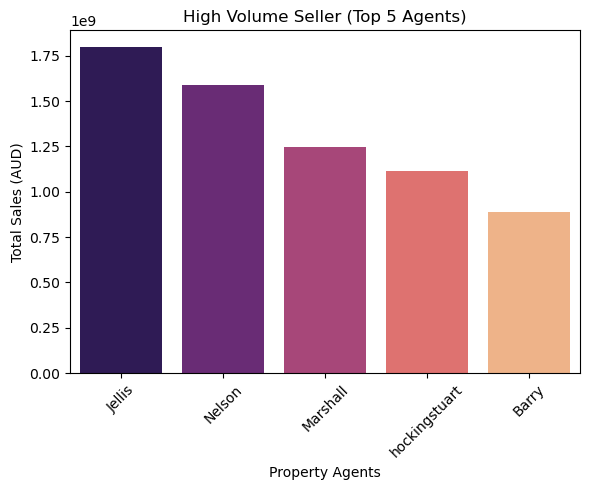

In [16]:
#chart for top 5 most selling agents
plt.figure(figsize=(6, 5))
sns.barplot(x=melb_agent_total.index, y=melb_agent_total.values, palette='magma')

plt.title('High Volume Seller (Top 5 Agents)')
plt.xlabel('Property Agents')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [17]:
#to count how many houses the agent sold 
top_five = ['Jellis', 'Nelson', 'Marshall', 'hockingstuart', 'Barry']
total_house = melhousingclean_df[melhousingclean_df['PropertyAgent'].isin(top_five)]
melb_agent_total_house = total_house['PropertyAgent'].value_counts()
melb_agent_total_house

PropertyAgent
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Marshall          659
Name: count, dtype: int64

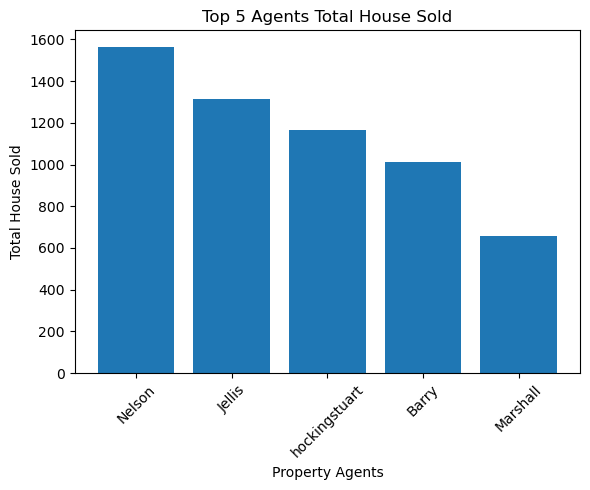

In [18]:
#to show how many houses the agent sold 
plt.figure(figsize=(6, 5))
plt.bar(melb_agent_total_house.index, melb_agent_total_house.values, alpha=1.0, facecolor='#1f77b4', align="center")

plt.title('Top 5 Agents Total House Sold')
plt.xlabel('Property Agents')
plt.ylabel('Total House Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [19]:
#identifying bottom 5-volume agents
melb_agent_total_last = melhousingclean_df.groupby('PropertyAgent')['Price'].sum().sort_values(ascending=True).head(5)
melb_agent_total_last

PropertyAgent
Rosin                      330000
hockingstuart/Advantage    330000
hockingstuart/Village      345000
Wood                       370000
Oak                        380000
Name: Price, dtype: int64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/3769633204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=melb_agent_total_last.index, y=melb_agent_total_last.values, palette='magma')


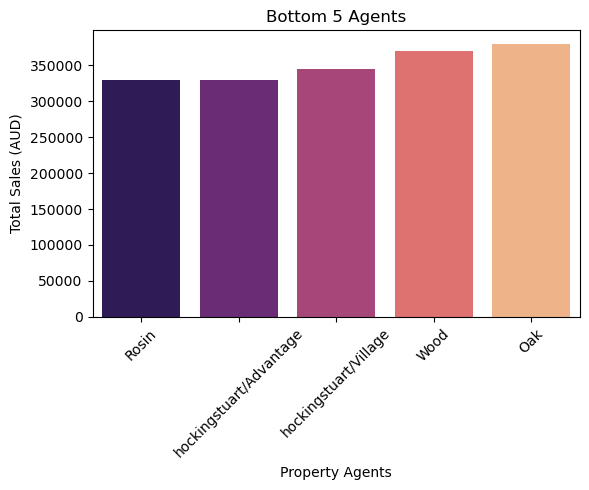

In [20]:
#chart for bottom 5 volume agents
plt.figure(figsize=(6, 5))
sns.barplot(x=melb_agent_total_last.index, y=melb_agent_total_last.values, palette='magma')

plt.title('Bottom 5 Agents')
plt.xlabel('Property Agents')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [21]:
#to count how many house the agent sold for bottom 5
bottom_five = ['Rosin', 'hockingstuart/Advantage', 'hockingstuart/Village', 'Wood', 'Oak']
total_bottom_house = melhousingclean_df[melhousingclean_df['PropertyAgent'].isin(bottom_five)]
melb_agent_bottom_house = total_bottom_house['PropertyAgent'].value_counts()
melb_agent_bottom_house
#there is no need to visualize the data

PropertyAgent
hockingstuart/Advantage    1
Wood                       1
hockingstuart/Village      1
Oak                        1
Rosin                      1
Name: count, dtype: int64

In [22]:
#BONUS INFORMATION
#to find top 5 agent by average total sell
#to represent agents who may deal in higher-end properties, show the possibility that agents sell luxury property
melb_agent_avg = melhousingclean_df.groupby('PropertyAgent')['Price'].mean().sort_values(ascending=False).head(5)
melb_agent_avg

PropertyAgent
Weast        3.320000e+06
Darras       2.950000e+06
VICProp      2.797667e+06
Sotheby's    2.453750e+06
Lucas        2.450000e+06
Name: Price, dtype: float64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/3130921094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=melb_agent_avg.index, y=melb_agent_avg.values, palette='magma')


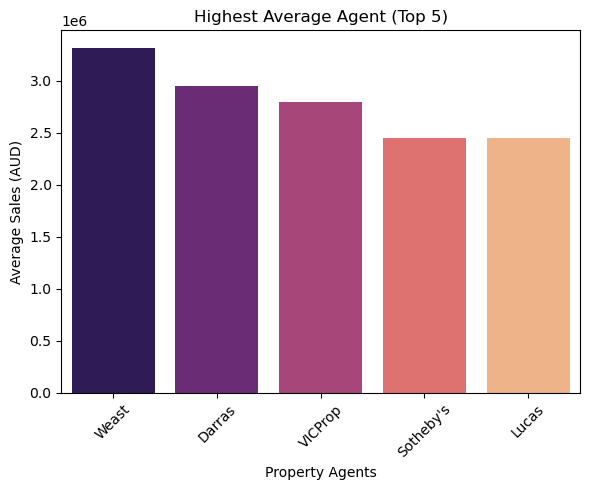

In [23]:
#chart for top 5 agent by average sales
plt.figure(figsize=(6, 5))
sns.barplot(x=melb_agent_avg.index, y=melb_agent_avg.values, palette='magma')

plt.title('Highest Average Agent (Top 5)')
plt.xlabel('Property Agents')
plt.ylabel('Average Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [24]:
#to count how many house the agent sold 
avg_five = ["Weast", "Darras", "VICProp", "Sotheby's", "Lucas"]
avg_total_house = melhousingclean_df[melhousingclean_df['PropertyAgent'].isin(avg_five)]
melb_agent_avg_house = avg_total_house['PropertyAgent'].value_counts()
melb_agent_avg_house
#there is no need to make a visualization of data

PropertyAgent
Sotheby's    6
VICProp      3
Weast        1
Lucas        1
Darras       1
Name: count, dtype: int64

In [25]:
#FIND HOW MANY HOUSES SOLD PER YEAR

In [26]:
#to get the information of NaN row in year column
nan_count = melhousingclean_df['Year'].isna().sum()
nan_count

20

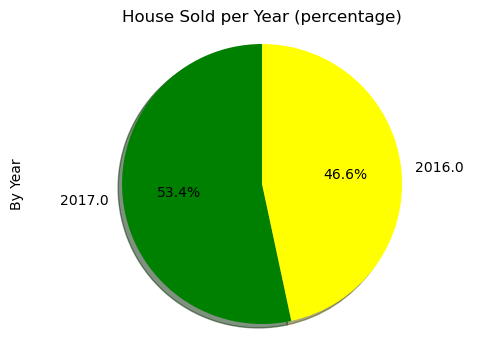

In [27]:
#to find the percentage of house sold in each year with pie chart using pyplot
house_sold_per_year = melhousingclean_df['Year'].value_counts()
#explode=(0.1)

plt.figure(figsize=(6, 4))
plt.pie(house_sold_per_year,
        #explode=explode,
        labels=house_sold_per_year.index, 
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=['green', 'yellow'])

plt.title('House Sold per Year (percentage)')
plt.ylabel('By Year')
plt.axis('equal')
plt.show()

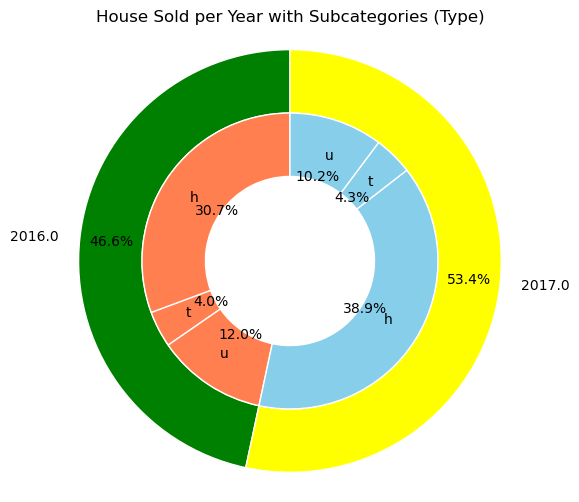

In [28]:
#to visualize the percentage of property types sold for each year
#groupby Year and Type
house_percent = melhousingclean_df.groupby(['Year', 'Type']).size()
inner_colors = ['coral', 'coral', 'coral', 'skyblue', 'skyblue', 'skyblue']

#create the outer and inner pie chart data
outer_labels = house_percent.index.get_level_values(0).unique()  # Years
inner_labels = house_percent.index.get_level_values(1)  # Types
outer_values = house_percent.groupby(level=0).sum()  # Total counts per year
inner_values = house_percent.values  # Counts for each type within the years

#create the nested pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# create the outer pie (for years)
ax.pie(outer_values, labels=outer_labels, radius=1, autopct='%1.1f%%', startangle=90,
       pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='w'), colors=['green', 'yellow'])

# create the inner pie (for property types)
ax.pie(inner_values, labels=inner_labels, radius=0.7, autopct='%1.1f%%', startangle=90, 
       labeldistance=0.75, wedgeprops=dict(width=0.3, edgecolor='w'), colors=inner_colors)

# to add title and display the plot
plt.title('House Sold per Year with Subcategories (Type)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

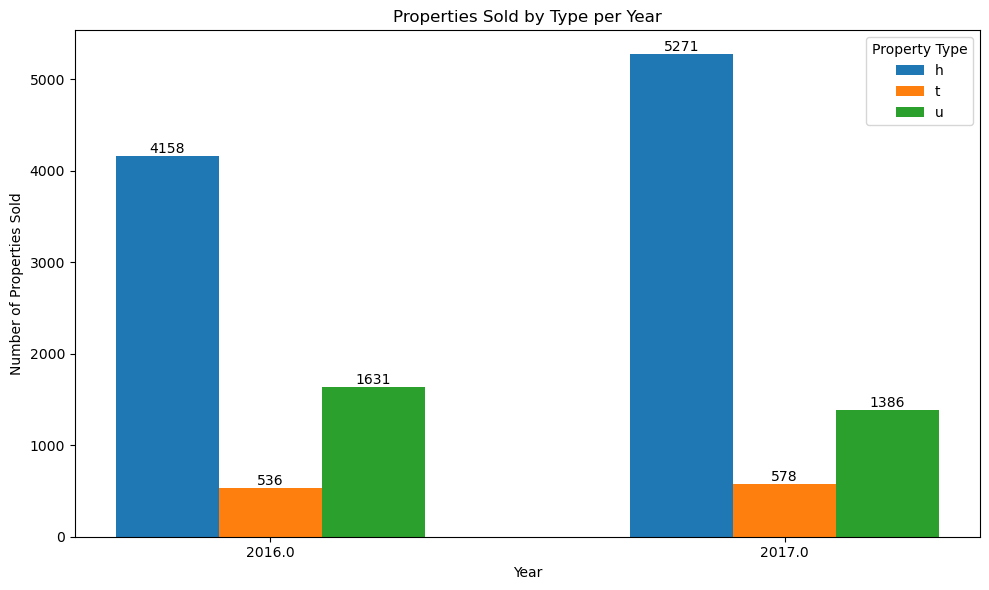

In [29]:
#to visualize how many property types sold for each year in bar plot

# group data by year and type
house_per_year = melhousingclean_df.groupby(['Year', 'Type']).size().reset_index(name='Count')

#plot data, create figure
plt.figure(figsize=(10, 6))

property_types = house_per_year['Type'].unique()
years = house_per_year['Year'].unique()

bar_width = 0.2
positions = list(range(len(years)))

for i, property_type in enumerate(property_types):
    subset = house_per_year[house_per_year['Type'] == property_type]
    bars = plt.bar([p + i * bar_width for p in positions], subset['Count'], width=bar_width, label=property_type)
    
    # to add counts number for each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.title('Properties Sold by Type per Year')
plt.xticks([p + bar_width for p in positions], years)
plt.legend(title='Property Type')

# Display the chart
plt.tight_layout()
plt.show()

In [30]:
#find the relation of house distance from CBD to house price by all 8 regions in Melbourne

In [31]:
#find how many category of distances
distance = melhousingclean_df['Distance'].value_counts()
distance

Distance
11.2    739
9.2     367
13.9    324
7.8     306
4.6     263
       ... 
37.5      1
29.3      1
47.4      1
39.8      1
48.1      1
Name: count, Length: 202, dtype: int64

In [32]:
#find all the region with groupby to see the houses' distance from cbd in that region
region_distance = melhousingclean_df.groupby('Regionname')['Distance'].value_counts()
region_distance

Regionname            Distance
Eastern Metropolitan  13.8        99
                      13.9        89
                      11.8        83
                      7.9         80
                      10.5        60
                                  ..
Western Metropolitan  23.8         2
                      27.7         2
Western Victoria      29.8        19
                      31.7        12
                      37.5         1
Name: count, Length: 285, dtype: int64

In [33]:
region_names = melhousingclean_df['Regionname'].value_counts()
region_names

Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: count, dtype: int64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/1610217272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regionname', y='Distance', data=melhousingclean_df, palette='magma')


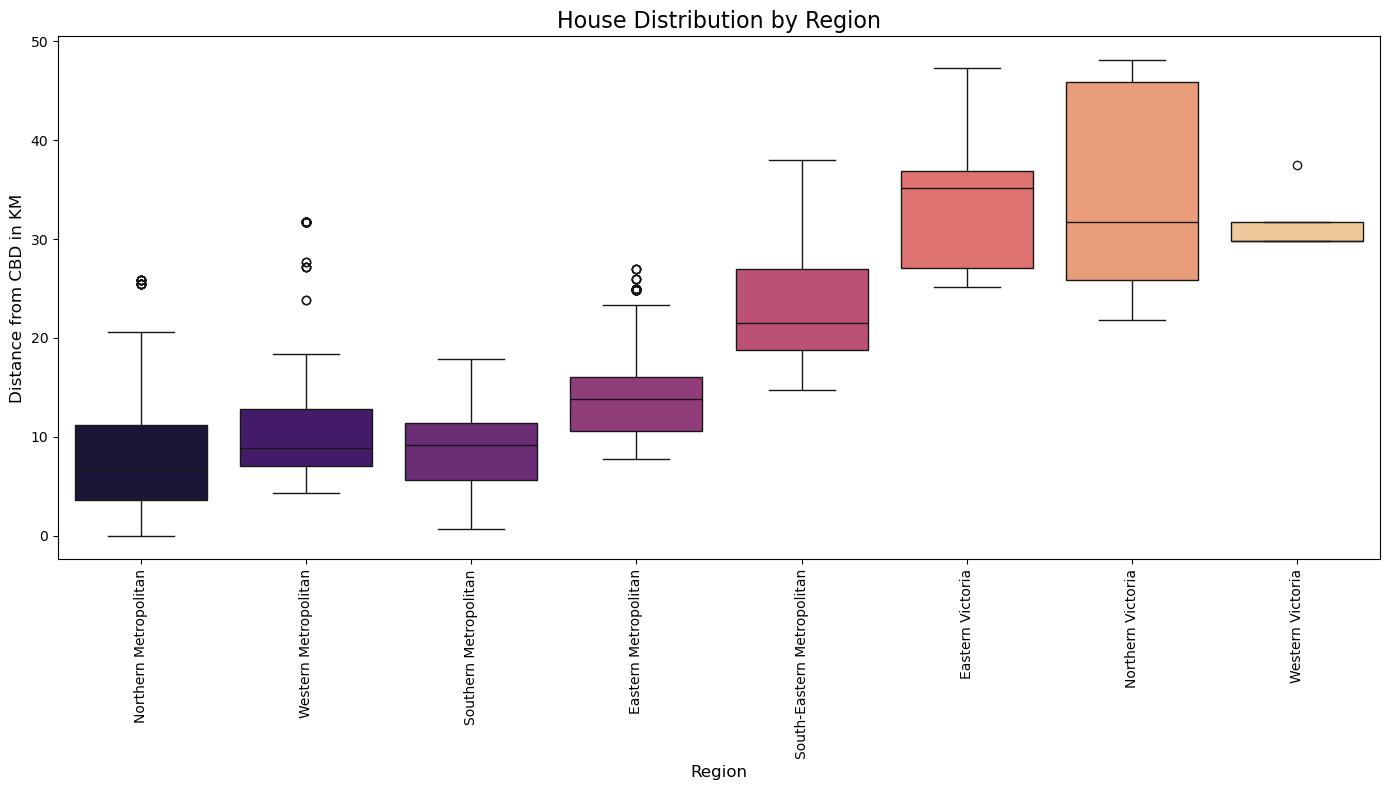

In [34]:
#set the figure
plt.figure(figsize=(14, 8))

#create boxplot
sns.boxplot(x='Regionname', y='Distance', data=melhousingclean_df, palette='magma')

#add title and labels
plt.title('House Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Distance from CBD in KM', fontsize=12)
plt.xticks(rotation=90) 
plt.tight_layout() #to make the layout tidy


#show the plot
plt.show()

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/3750260871.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regionname', y='Price', data=melhousingclean_df, palette='magma')


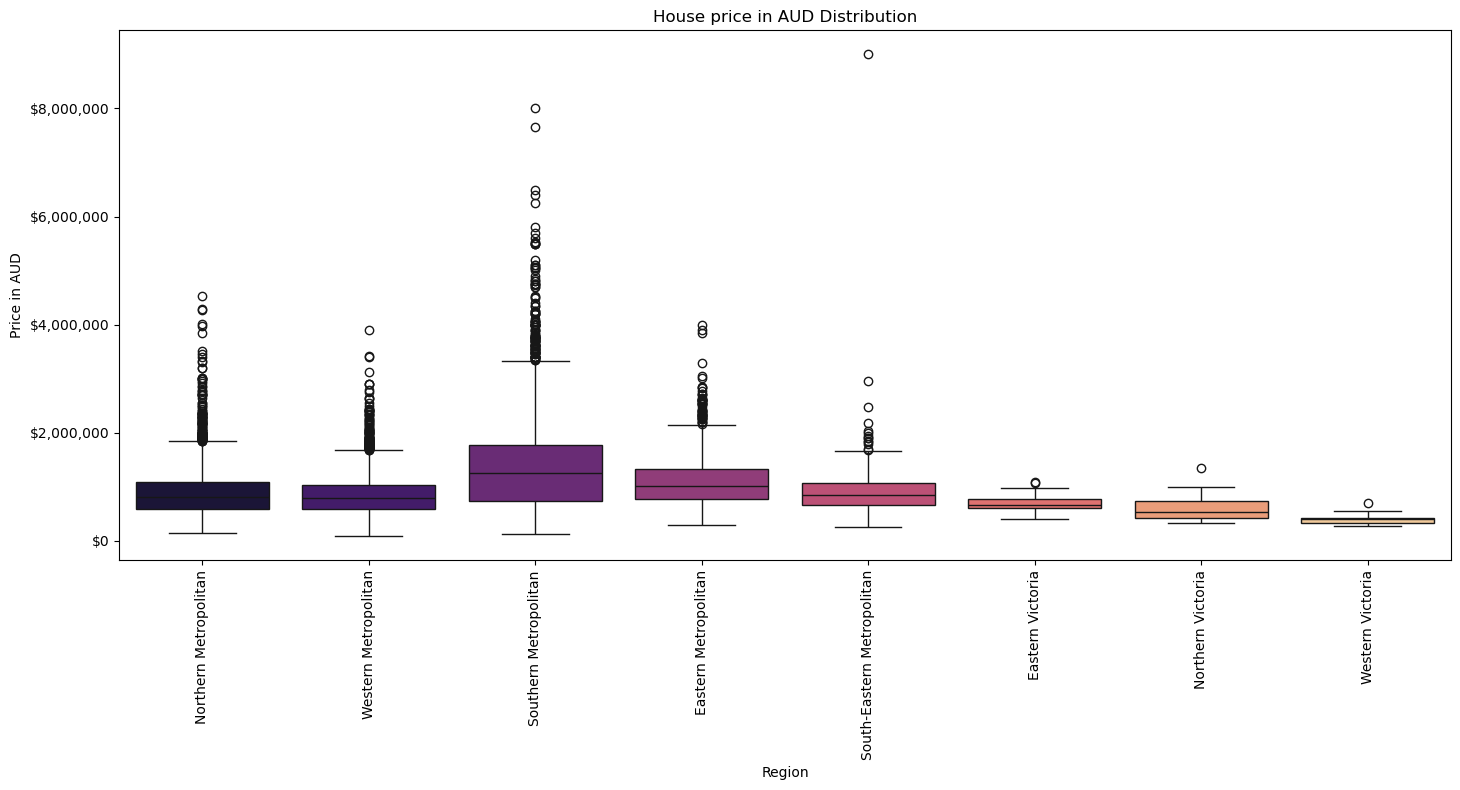

In [35]:
#after we found the distance for each region, we want to know how is the price affected by the distance

# Set figure
plt.figure(figsize=(14, 8))

#create boxplot
sns.boxplot(x='Regionname', y='Price', data=melhousingclean_df, palette='magma')

#add title and labels
plt.title('House price in AUD Distribution')
plt.xlabel('Region')
plt.ylabel('Price in AUD')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}')) #use get current axis to display the numbers as currency

# show the plot
plt.show()

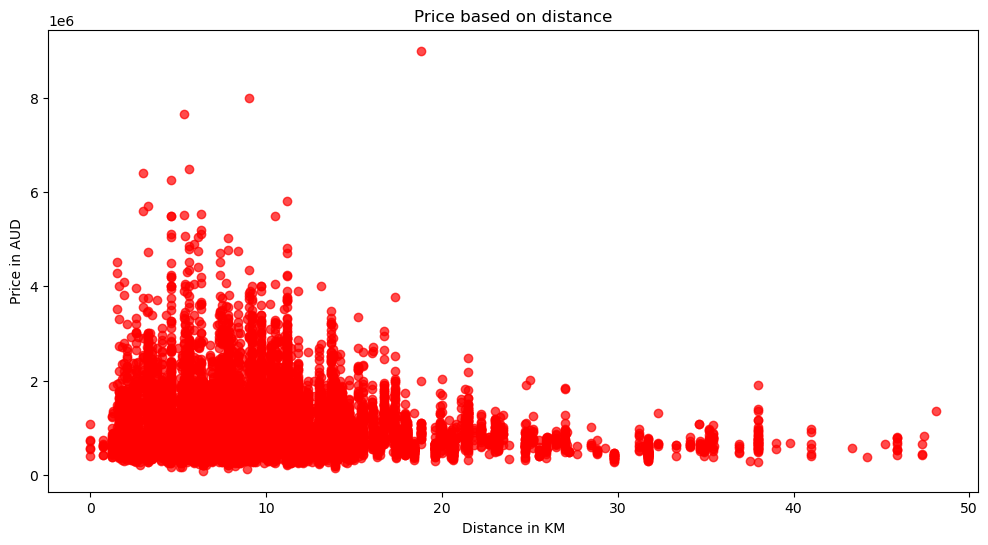

In [36]:
#to create the plot
plt.figure(figsize=(12, 6))
#to create the scatter
plt.scatter(melhousingclean_df['Distance'], melhousingclean_df['Price'], color='red', alpha=0.7)

plt.title('Price based on distance')
plt.xlabel('Distance in KM')
plt.ylabel('Price in AUD')


plt.show()

# Part 2 Analysis - Ingrid

In [37]:
melhousingdate_df = melhousingclean_df [["Date","Price","Type","Suburb"]]
replace_type = {
    'h': 'house',
    'u': 'unit',
    't': 'townhouse'
}
melhousingclean_df['Type'] = melhousingclean_df['Type'].replace(replace_type)
melhousingdate_df

Date    Price Type         Suburb
0      12/3/2016  1480000    h     Abbotsford
1       2/4/2016  1035000    h     Abbotsford
2       3/4/2017  1465000    h     Abbotsford
3       3/4/2017   850000    h     Abbotsford
4       6/4/2016  1600000    h     Abbotsford
...          ...      ...  ...            ...
13575  8/26/2017  1245000    h  Wheelers Hill
13576  8/26/2017  1031000    h   Williamstown
13577  8/26/2017  1170000    h   Williamstown
13578  8/26/2017  2500000    h   Williamstown
13579  8/26/2017  1285000    h     Yarraville

[13580 rows x 4 columns]

In [38]:
melhousingdatesorted_df= melhousingdate_df.sort_values(by='Date')
melhousingdatesorted_df

Date    Price Type        Suburb
6183    1/28/2016   813000    u  Surrey Hills
6184    1/28/2016  1205000    h  Surrey Hills
5494   10/15/2016   780000    h        Seddon
4438   10/15/2016  1010000    h     Northcote
2804   10/15/2016  1220000    t     Glen Iris
...           ...      ...  ...           ...
12499    9/9/2017  1225000    h    Flemington
12500    9/9/2017   800000    h     Footscray
12501    9/9/2017  1010000    h     Frankston
12491    9/9/2017   375000    h        Epping
12460    9/9/2017  3130000    h    Canterbury

[13580 rows x 4 columns]

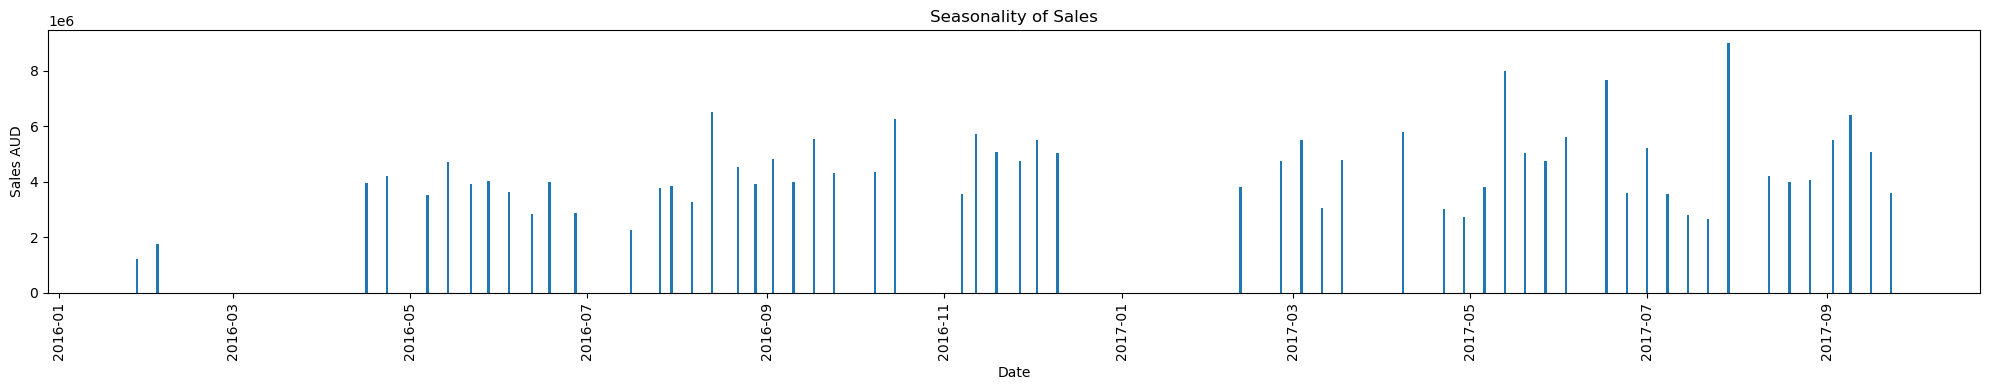

In [44]:
plt.figure(figsize=(20,4))
Date=melhousingdatesorted_df['Date']
Price=melhousingdatesorted_df['Price']
plt.bar(Date.values, Price.values, alpha=1.0, facecolor='#1f77b4', align="center")
plt.xlabel('Date')
plt.xticks (rotation ="vertical")
plt.ylabel('Sales AUD')

plt.title('Seasonality of Sales')
plt.tight_layout()
plt.show()

In [52]:
# Step 1: Convert the 'Date' column to datetime
melhousingdatesorted2_df=melhousingdatesorted_df
melhousingdatesorted2_df['Date'] = pd.to_datetime(melhousingdatesorted_df['Date'], format='%m/%d/%Y')
melhousingdatesorted2_df['Date'] 

6183    2016-01-28
6184    2016-01-28
5494    2016-10-15
4438    2016-10-15
2804    2016-10-15
           ...    
12499   2017-09-09
12500   2017-09-09
12501   2017-09-09
12491   2017-09-09
12460   2017-09-09
Name: Date, Length: 13580, dtype: datetime64[ns]

In [54]:
# Step 2: Group by Year and Month and calculate the total Price for each group
melhousingdatesorted2_df['YearMonth'] = melhousingdatesorted_df['Date'].dt.to_period('M')  

# Create a Year-Month column
total_sales_per_month = melhousingdatesorted2_df.groupby('YearMonth')['Price'].sum()  

In [55]:
# Group by Year-Month and sum the Price
# Step 3: Display the result
print(total_sales_per_month)

YearMonth
2016-01       2018000
2016-02      23612750
2016-04     316741750
2016-05     940410800
2016-06     767406240
2016-07     419818446
2016-08     768646549
2016-09    1016925100
2016-10     587002688
2016-11    1244909014
2016-12     710747009
2017-02     465623838
2017-03     773771638
2017-04     649498826
2017-05    1281517889
2017-06    1202315325
2017-07    1363108186
2017-08     999126958
2017-09    1074588793
Freq: M, Name: Price, dtype: int64


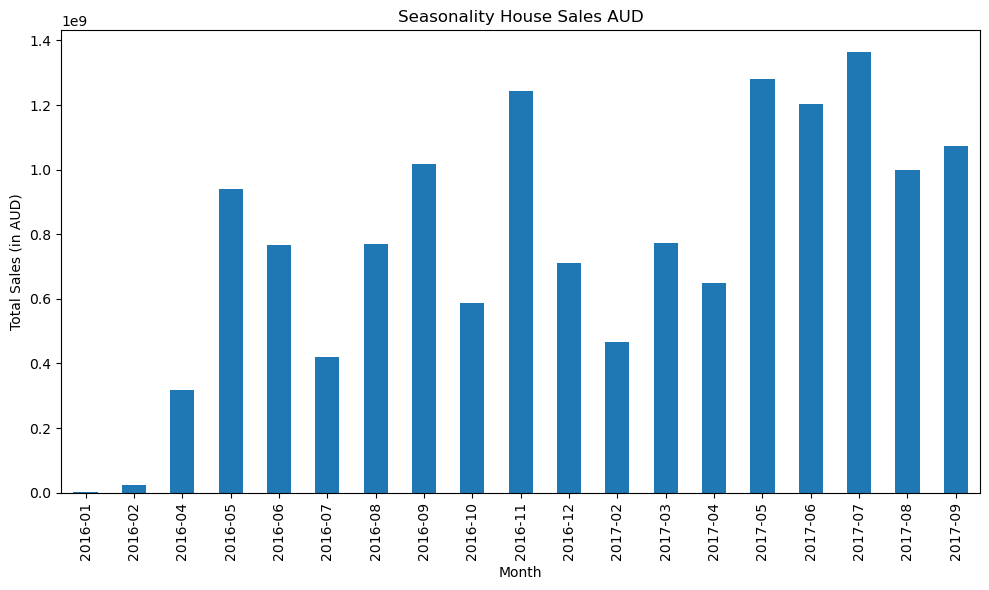

In [56]:
# Step 1: Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the plot
total_sales_per_month.plot(kind='bar')

# Step 2: Customize the plot
plt.title('Seasonality House Sales AUD')
plt.xlabel('Month')
plt.ylabel('Total Sales (in AUD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Step 3: Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [57]:
Type_trends_df= melhousingclean_df [["Date","Price","Type"]]
Type_trends_df

Date    Price   Type
0      12/3/2016  1480000  house
1       2/4/2016  1035000  house
2       3/4/2017  1465000  house
3       3/4/2017   850000  house
4       6/4/2016  1600000  house
...          ...      ...    ...
13575  8/26/2017  1245000  house
13576  8/26/2017  1031000  house
13577  8/26/2017  1170000  house
13578  8/26/2017  2500000  house
13579  8/26/2017  1285000  house

[13580 rows x 3 columns]

In [58]:
Type_trends_h_df= Type_trends_df.query('Type=="house"')
Type_trends_h_df.head()

Date    Price   Type
0  12/3/2016  1480000  house
1   2/4/2016  1035000  house
2   3/4/2017  1465000  house
3   3/4/2017   850000  house
4   6/4/2016  1600000  house

In [61]:
Type_trends_h_df['Date'] = pd.to_datetime(Type_trends_h_df['Date'])
Typemonthly_data_monthly_h_df = Type_trends_h_df.resample('ME', on='Date').sum()
Typemonthly_data_monthly_h_df

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/4204934386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Type_trends_h_df['Date'] = pd.to_datetime(Type_trends_h_df['Date'])


Price                                               Type
Date                                                                     
2016-01-31     1205000                                              house
2016-02-29    16876750  househousehousehousehousehousehousehousehouseh...
2016-03-31           0                                                  0
2016-04-30   255219000  househousehousehousehousehousehousehousehouseh...
2016-05-31   744249650  househousehousehousehousehousehousehousehouseh...
2016-06-30   593158400  househousehousehousehousehousehousehousehouseh...
2016-07-31   320044446  househousehousehousehousehousehousehousehouseh...
2016-08-31   607330221  househousehousehousehousehousehousehousehouseh...
2016-09-30   793750450  househousehousehousehousehousehousehousehouseh...
2016-10-31   465411388  househousehousehousehousehousehousehousehouseh...
2016-11-30   984006908  househousehousehousehousehousehousehousehouseh...
2016-12-31   580061710  househousehousehousehousehousehousehousehouseh...
2017-01-31           0                                                  0
2017-02-28   365795088  househousehousehousehousehousehousehousehouseh...
2017-03-31   595671638  househousehousehousehousehousehousehousehouseh...
2017-04-30   472637376  househousehousehousehousehousehousehousehouseh...
2017-05-31  1023975739  househousehousehousehousehousehousehousehouseh...
2017-06-30   975258575  househousehousehousehousehousehousehousehouseh...
2017-07-31  1056214538  househousehousehousehousehousehousehousehouseh...
2017-08-31   897334658  househousehousehousehousehousehousehousehouseh...
2017-09-30   993737793  househousehousehousehousehousehousehousehouseh...

In [62]:
#Typemonthly_data_monthly_h_df = Type_trends_h_df.resample('ME', on='Date').sum()
#Typemonthly_data_monthly_h_df

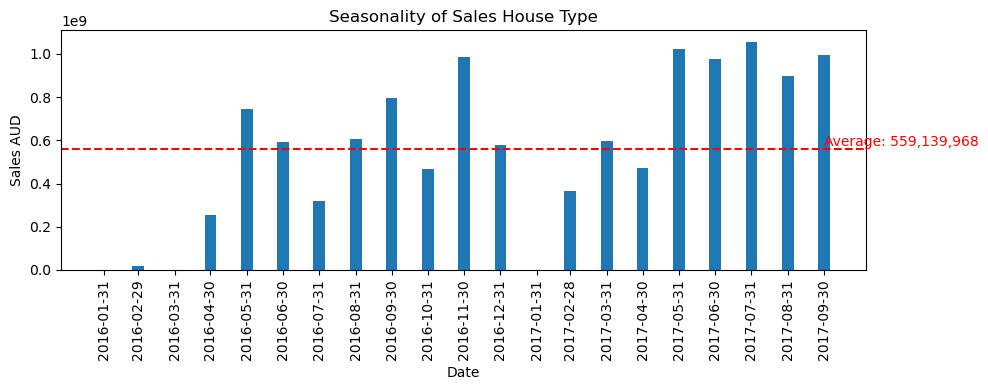

In [63]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Typemonthly_data_monthly_h_df.index
Price = Typemonthly_data_monthly_h_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Sales AUD')

plt.title('Seasonality of Sales House Type')
plt.tight_layout()

plt.show()

In [64]:
Type_trends_u_df= Type_trends_df.query('Type=="unit"')
Type_trends_u_df.head()

Date    Price  Type
8    10/8/2016   300000  unit
10  11/12/2016   700000  unit
12  11/12/2016   750000  unit
14   5/14/2016   441000  unit
22   3/18/2017  1090000  unit

In [65]:
Typemonthly_data_monthly_u_df = Type_trends_h_df.resample('ME', on='Date').sum()
Typemonthly_data_monthly_u_df

Price                                               Type
Date                                                                     
2016-01-31     1205000                                              house
2016-02-29    16876750  househousehousehousehousehousehousehousehouseh...
2016-03-31           0                                                  0
2016-04-30   255219000  househousehousehousehousehousehousehousehouseh...
2016-05-31   744249650  househousehousehousehousehousehousehousehouseh...
2016-06-30   593158400  househousehousehousehousehousehousehousehouseh...
2016-07-31   320044446  househousehousehousehousehousehousehousehouseh...
2016-08-31   607330221  househousehousehousehousehousehousehousehouseh...
2016-09-30   793750450  househousehousehousehousehousehousehousehouseh...
2016-10-31   465411388  househousehousehousehousehousehousehousehouseh...
2016-11-30   984006908  househousehousehousehousehousehousehousehouseh...
2016-12-31   580061710  househousehousehousehousehousehousehousehouseh...
2017-01-31           0                                                  0
2017-02-28   365795088  househousehousehousehousehousehousehousehouseh...
2017-03-31   595671638  househousehousehousehousehousehousehousehouseh...
2017-04-30   472637376  househousehousehousehousehousehousehousehouseh...
2017-05-31  1023975739  househousehousehousehousehousehousehousehouseh...
2017-06-30   975258575  househousehousehousehousehousehousehousehouseh...
2017-07-31  1056214538  househousehousehousehousehousehousehousehouseh...
2017-08-31   897334658  househousehousehousehousehousehousehousehouseh...
2017-09-30   993737793  househousehousehousehousehousehousehousehouseh...

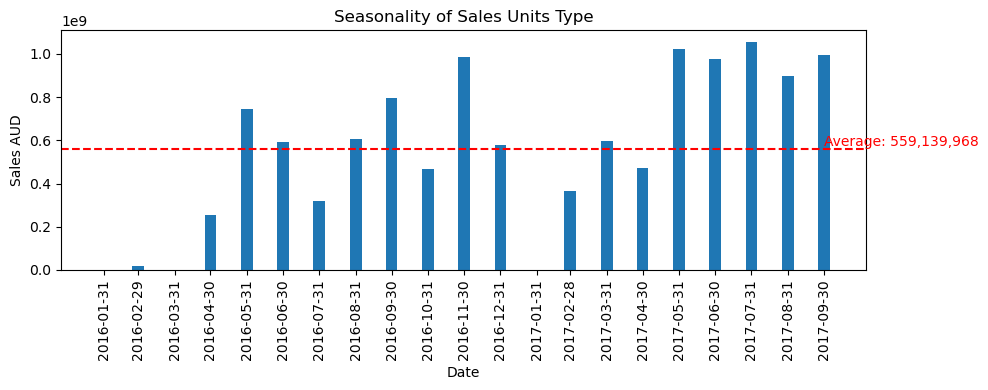

In [66]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Typemonthly_data_monthly_u_df.index
Price = Typemonthly_data_monthly_u_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Sales AUD')

plt.title('Seasonality of Sales Units Type')
plt.tight_layout()

plt.show()

In [67]:
Type_trends_t_df= Type_trends_df.query('Type=="townhouse"')
Type_trends_t_df.head()

Date   Price       Type
21   3/18/2017  900000  townhouse
38    9/3/2016  840000  townhouse
42    3/4/2017  700000  townhouse
48    5/7/2016  450000  townhouse
56  10/15/2016  700000  townhouse

In [68]:
Typemonthly_data_monthly_t_df = Type_trends_h_df.resample('ME', on='Date').sum()
Typemonthly_data_monthly_t_df

Price                                               Type
Date                                                                     
2016-01-31     1205000                                              house
2016-02-29    16876750  househousehousehousehousehousehousehousehouseh...
2016-03-31           0                                                  0
2016-04-30   255219000  househousehousehousehousehousehousehousehouseh...
2016-05-31   744249650  househousehousehousehousehousehousehousehouseh...
2016-06-30   593158400  househousehousehousehousehousehousehousehouseh...
2016-07-31   320044446  househousehousehousehousehousehousehousehouseh...
2016-08-31   607330221  househousehousehousehousehousehousehousehouseh...
2016-09-30   793750450  househousehousehousehousehousehousehousehouseh...
2016-10-31   465411388  househousehousehousehousehousehousehousehouseh...
2016-11-30   984006908  househousehousehousehousehousehousehousehouseh...
2016-12-31   580061710  househousehousehousehousehousehousehousehouseh...
2017-01-31           0                                                  0
2017-02-28   365795088  househousehousehousehousehousehousehousehouseh...
2017-03-31   595671638  househousehousehousehousehousehousehousehouseh...
2017-04-30   472637376  househousehousehousehousehousehousehousehouseh...
2017-05-31  1023975739  househousehousehousehousehousehousehousehouseh...
2017-06-30   975258575  househousehousehousehousehousehousehousehouseh...
2017-07-31  1056214538  househousehousehousehousehousehousehousehouseh...
2017-08-31   897334658  househousehousehousehousehousehousehousehouseh...
2017-09-30   993737793  househousehousehousehousehousehousehousehouseh...

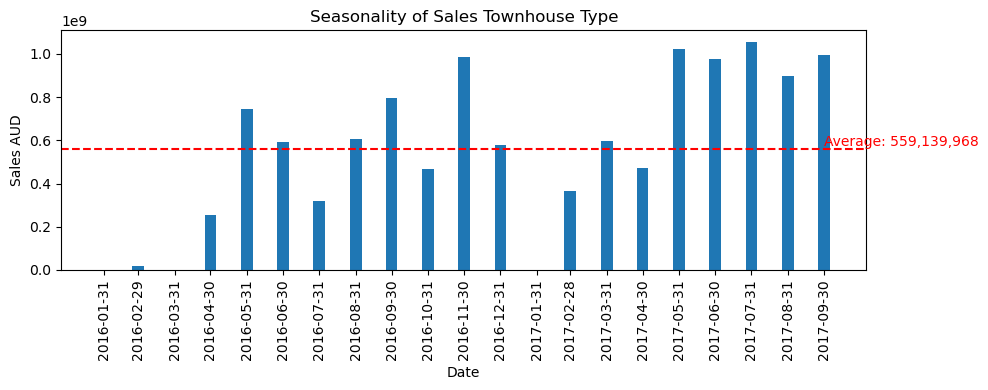

In [69]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Typemonthly_data_monthly_t_df.index
Price = Typemonthly_data_monthly_t_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Sales AUD')

plt.title('Seasonality of Sales Townhouse Type')
plt.tight_layout()

plt.show()

In [70]:
# Step 2: Group by Year and Month and calculate the total Price for each group
melhousingdatesorted2_df['YearMonth'] = melhousingdatesorted_df['Date'].dt.to_period('M')  

# Create a Year-Month column
total_avg_sales_per_month = melhousingdatesorted2_df.groupby('YearMonth')['Price'].mean()  
print(total_avg_sales_per_month)

YearMonth
2016-01    1.009000e+06
2016-02    9.081827e+05
2016-04    9.960432e+05
2016-05    1.046063e+06
2016-06    1.048369e+06
2016-07    9.412970e+05
2016-08    1.073529e+06
2016-09    1.099378e+06
2016-10    1.065341e+06
2016-11    1.117513e+06
2016-12    1.170918e+06
2017-02    1.116604e+06
2017-03    1.141256e+06
2017-04    1.029317e+06
2017-05    1.134087e+06
2017-06    1.095005e+06
2017-07    8.874402e+05
2017-08    1.197994e+06
2017-09    1.168031e+06
Freq: M, Name: Price, dtype: float64


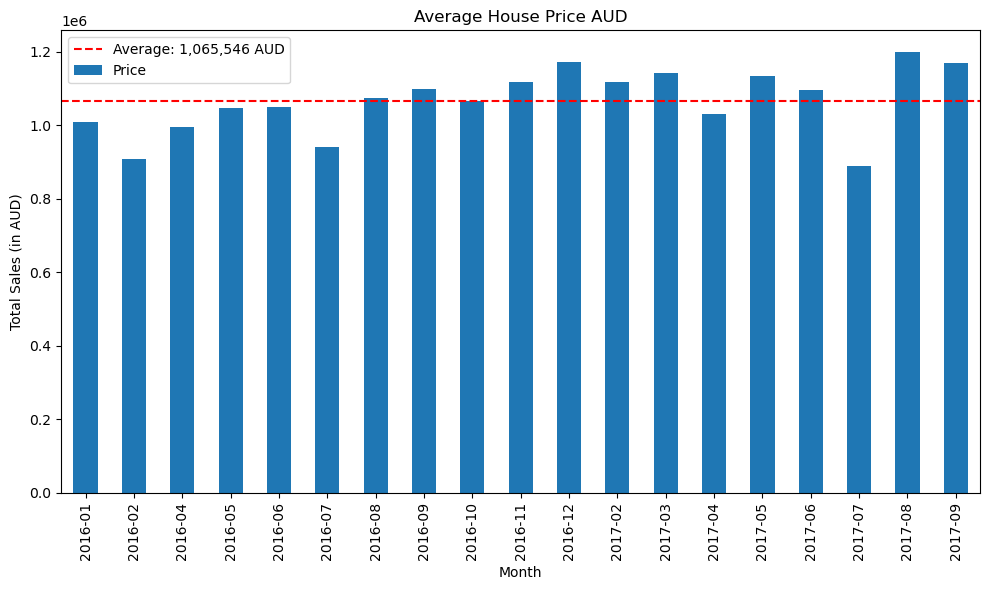

In [71]:
# Step 1: Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the plot
total_avg_sales_per_month.plot(kind='bar')

average_sales = total_avg_sales_per_month.mean()
plt.axhline(y=average_sales, color='red', linestyle='--', label=f'Average: {average_sales:,.0f} AUD')

# Step 2: Customize the plot
plt.title('Average House Price AUD')
plt.xlabel('Month')
plt.ylabel('Total Sales (in AUD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Step 3: Show the plot
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [72]:
numberofrooms_trends_df= melhousingclean_df [["Date","Price","Bedroom2"]]
numberofrooms_trends_df

Date    Price  Bedroom2
0      12/3/2016  1480000         2
1       2/4/2016  1035000         2
2       3/4/2017  1465000         3
3       3/4/2017   850000         3
4       6/4/2016  1600000         3
...          ...      ...       ...
13575  8/26/2017  1245000         4
13576  8/26/2017  1031000         3
13577  8/26/2017  1170000         3
13578  8/26/2017  2500000         4
13579  8/26/2017  1285000         4

[13580 rows x 3 columns]

In [73]:
Bedroomprices_1_df= numberofrooms_trends_df.query('Bedroom2==1')
Bedroomprices_1_df.head()

Date   Price  Bedroom2
8   10/8/2016  300000         1
14  5/14/2016  441000         1
26  8/22/2016  426000         1
28  8/22/2016  457000         1
33  7/26/2016  470000         1

In [75]:
Bedroomprices_1_df['Date'] = pd.to_datetime(Bedroomprices_1_df['Date'])
Bedroomprices1_monthly_df= Bedroomprices_1_df.resample('ME', on='Date').mean()
Bedroomprices1_monthly_df.head()

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/1295143713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bedroomprices_1_df['Date'] = pd.to_datetime(Bedroomprices_1_df['Date'])


Price  Bedroom2
Date                               
2016-02-29  233000.000000       1.0
2016-03-31            NaN       NaN
2016-04-30  360576.923077       1.0
2016-05-31  445636.363636       1.0
2016-06-30  474861.111111       1.0

In [76]:
#Bedroomprices1_monthly_df= Bedroomprices_1_df.resample('ME', on='Date').mean()
#Bedroomprices1_monthly_df.head()

In [77]:
Bedroomprices1_monthly_df= Bedroomprices_1_df.resample('ME', on='Date').mean()
Bedroomprices1_monthly_df.fillna(0, inplace=True)
Bedroomprices1_monthly_df

Price  Bedroom2
Date                               
2016-02-29  233000.000000       1.0
2016-03-31       0.000000       0.0
2016-04-30  360576.923077       1.0
2016-05-31  445636.363636       1.0
2016-06-30  474861.111111       1.0
2016-07-31  430533.333333       1.0
2016-08-31  449900.000000       1.0
2016-09-30  440050.000000       1.0
2016-10-31  422567.647059       1.0
2016-11-30  466804.362319       1.0
2016-12-31  451460.465116       1.0
2017-01-31       0.000000       0.0
2017-02-28  432089.285714       1.0
2017-03-31  426368.421053       1.0
2017-04-30  461127.272727       1.0
2017-05-31  489032.000000       1.0
2017-06-30  467229.729730       1.0
2017-07-31  411509.868421       1.0
2017-08-31  436900.000000       1.0
2017-09-30  628000.000000       1.0

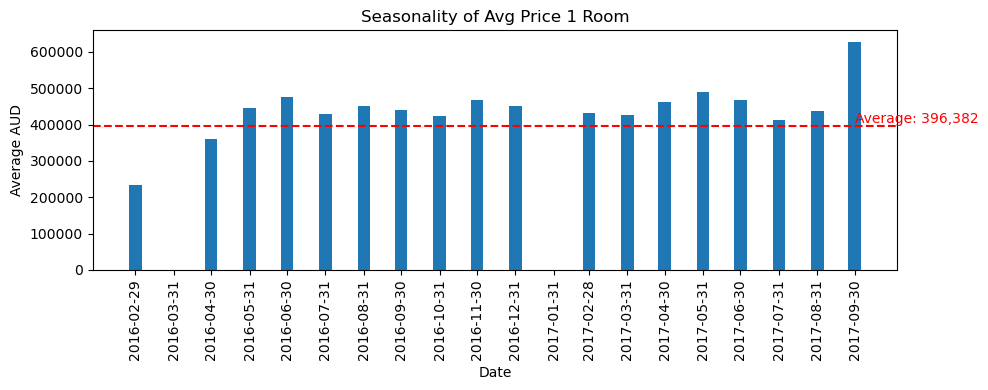

In [78]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices1_monthly_df.index
Price = Bedroomprices1_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 1 Room')
plt.tight_layout()

plt.show()

In [79]:
Bedroomprices_2_df= numberofrooms_trends_df.query('Bedroom2==2')
Bedroomprices_2_df.head()

Date    Price  Bedroom2
0    12/3/2016  1480000         2
1     2/4/2016  1035000         2
5     5/7/2016   941000         2
7    10/8/2016  1636000         2
10  11/12/2016   700000         2

In [81]:
Bedroomprices_2_df['Date'] = pd.to_datetime(Type_trends_h_df['Date'])
Bedroomprices2_monthly_df= Bedroomprices_2_df.resample('ME', on='Date').mean()
Bedroomprices2_monthly_df.fillna(0, inplace=True)
Bedroomprices2_monthly_df

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/3864654596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bedroomprices_2_df['Date'] = pd.to_datetime(Type_trends_h_df['Date'])


Price  Bedroom2
Date                              
2016-02-29  9.042500e+05       2.0
2016-03-31  0.000000e+00       0.0
2016-04-30  9.781058e+05       2.0
2016-05-31  9.358840e+05       2.0
2016-06-30  9.856200e+05       2.0
2016-07-31  8.815554e+05       2.0
2016-08-31  1.066957e+06       2.0
2016-09-30  1.046014e+06       2.0
2016-10-31  1.036172e+06       2.0
2016-11-30  1.006339e+06       2.0
2016-12-31  1.131495e+06       2.0
2017-01-31  0.000000e+00       0.0
2017-02-28  1.092498e+06       2.0
2017-03-31  1.093262e+06       2.0
2017-04-30  1.086293e+06       2.0
2017-05-31  1.056276e+06       2.0
2017-06-30  1.077375e+06       2.0
2017-07-31  9.163469e+05       2.0
2017-08-31  1.132784e+06       2.0
2017-09-30  1.097204e+06       2.0

In [82]:
#Bedroomprices2_monthly_df= Bedroomprices_2_df.resample('ME', on='Date').mean()
#Bedroomprices2_monthly_df.fillna(0, inplace=True)
#Bedroomprices2_monthly_df
#Bedroomprices2_monthlyf_df['Price'] = Bedroomprices2_monthly_df['Price'].apply(lambda x: f'{x:,.0f}')

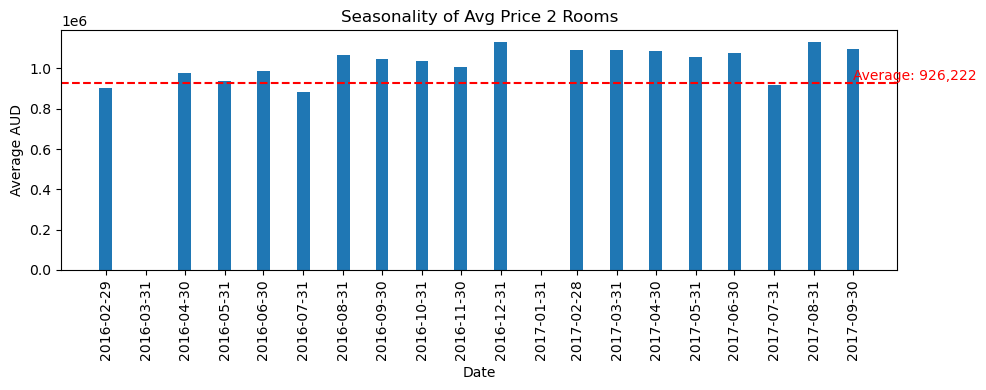

In [84]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices2_monthly_df.index
Price = Bedroomprices2_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 2 Rooms')
plt.tight_layout()

plt.show()

In [85]:
Bedroomprices_3_df= numberofrooms_trends_df.query('Bedroom2==3')

Bedroomprices_3_df.head()

Date    Price  Bedroom2
2     3/4/2017  1465000         3
3     3/4/2017   850000         3
4     6/4/2016  1600000         3
9    10/8/2016  1097000         3
11  11/12/2016  1350000         3

In [87]:
Bedroomprices_3_df['Date'] = pd.to_datetime(Bedroomprices_3_df['Date'])
Bedroomprices3_monthly_df= Bedroomprices_3_df.resample('ME', on='Date').mean()
Bedroomprices3_monthly_df.fillna(0, inplace=True)
Bedroomprices3_monthly_df

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/2236063361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bedroomprices_3_df['Date'] = pd.to_datetime(Bedroomprices_3_df['Date'])


Price  Bedroom2
Date                              
2016-01-31  1.205000e+06       3.0
2016-02-29  1.067054e+06       3.0
2016-03-31  0.000000e+00       0.0
2016-04-30  1.042850e+06       3.0
2016-05-31  1.085152e+06       3.0
2016-06-30  1.110174e+06       3.0
2016-07-31  1.075855e+06       3.0
2016-08-31  1.123935e+06       3.0
2016-09-30  1.180886e+06       3.0
2016-10-31  1.089783e+06       3.0
2016-11-30  1.138669e+06       3.0
2016-12-31  1.108248e+06       3.0
2017-01-31  0.000000e+00       0.0
2017-02-28  1.157283e+06       3.0
2017-03-31  1.196389e+06       3.0
2017-04-30  1.073464e+06       3.0
2017-05-31  1.145244e+06       3.0
2017-06-30  1.058983e+06       3.0
2017-07-31  9.028499e+05       3.0
2017-08-31  1.071776e+06       3.0
2017-09-30  1.050447e+06       3.0

In [88]:

#Bedroomprices3_monthly_df= Bedroomprices_3_df.resample('ME', on='Date').mean()
#Bedroomprices3_monthly_df.fillna(0, inplace=True)
#Bedroomprices3_monthly_df

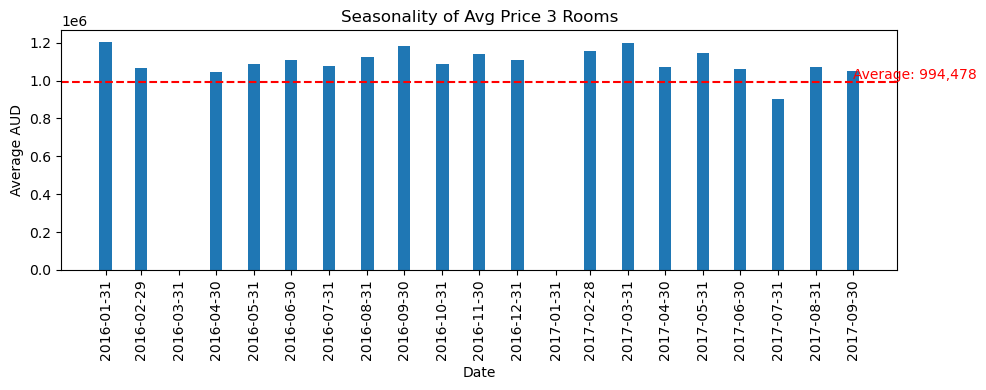

In [89]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices3_monthly_df.index
Price = Bedroomprices3_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 3 Rooms')
plt.tight_layout()

plt.show()

In [90]:
Bedroomprices_4_df= numberofrooms_trends_df.query('Bedroom2==4')
Bedroomprices_4_df.head()

Date    Price  Bedroom2
6     5/7/2016  1876000         4
20   3/18/2017  1330000         4
30   9/24/2016  1542000         4
74   9/24/2016   978000         4
76  11/27/2016   765000         4

In [92]:
Bedroomprices_4_df['Date'] = pd.to_datetime(Bedroomprices_4_df['Date'])
Bedroomprices4_monthly_df= Bedroomprices_4_df.resample('ME', on='Date').mean()
Bedroomprices4_monthly_df.fillna(0, inplace=True)
Bedroomprices4_monthly_df

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/888563626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bedroomprices_4_df['Date'] = pd.to_datetime(Bedroomprices_4_df['Date'])


Price  Bedroom2
Date                              
2016-02-29  8.830000e+05       4.0
2016-03-31  0.000000e+00       0.0
2016-04-30  1.493453e+06       4.0
2016-05-31  1.544042e+06       4.0
2016-06-30  1.489619e+06       4.0
2016-07-31  1.250465e+06       4.0
2016-08-31  1.674817e+06       4.0
2016-09-30  1.544586e+06       4.0
2016-10-31  1.641904e+06       4.0
2016-11-30  1.644271e+06       4.0
2016-12-31  1.699800e+06       4.0
2017-01-31  0.000000e+00       0.0
2017-02-28  1.703973e+06       4.0
2017-03-31  1.672309e+06       4.0
2017-04-30  1.471219e+06       4.0
2017-05-31  1.559643e+06       4.0
2017-06-30  1.372816e+06       4.0
2017-07-31  1.031870e+06       4.0
2017-08-31  1.433918e+06       4.0
2017-09-30  1.325109e+06       4.0

In [93]:
#Bedroomprices4_monthly_df= Bedroomprices_4_df.resample('ME', on='Date').mean()
#Bedroomprices4_monthly_df.fillna(0, inplace=True)
#Bedroomprices4_monthly_df

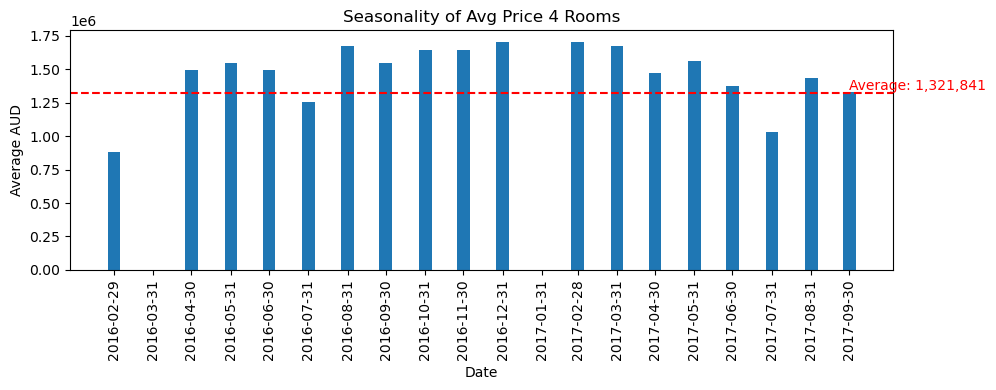

In [94]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices4_monthly_df.index
Price = Bedroomprices4_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 4 Rooms')
plt.tight_layout()

plt.show()

In [95]:
Bedroomprices_5_df= numberofrooms_trends_df.query('Bedroom2==5')
Bedroomprices_5_df.head()

Date    Price  Bedroom2
63    9/17/2016   773000         5
93   12/10/2016  2100000         5
124   6/12/2016  2840000         5
142   12/3/2016  1525000         5
186    9/3/2016  1085000         5

In [100]:
Bedroomprices_5_df['Date'] = pd.to_datetime(Bedroomprices_5_df['Date'])
Bedroomprices5_monthly_df= Bedroomprices_5_df.resample('ME', on='Date').mean()
Bedroomprices5_monthly_df.fillna(0,inplace=True)
Bedroomprices5_monthly_df

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/1162660047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bedroomprices_5_df['Date'] = pd.to_datetime(Bedroomprices_5_df['Date'])


Price  Bedroom2
Date                              
2016-04-30  1.483583e+06       5.0
2016-05-31  2.089042e+06       5.0
2016-06-30  1.883333e+06       5.0
2016-07-31  1.467000e+06       5.0
2016-08-31  2.093909e+06       5.0
2016-09-30  1.952290e+06       5.0
2016-10-31  2.044190e+06       5.0
2016-11-30  2.233269e+06       5.0
2016-12-31  2.355943e+06       5.0
2017-01-31  0.000000e+00       0.0
2017-02-28  1.710556e+06       5.0
2017-03-31  2.044000e+06       5.0
2017-04-30  1.946353e+06       5.0
2017-05-31  1.906981e+06       5.0
2017-06-30  1.578482e+06       5.0
2017-07-31  1.387561e+06       5.0
2017-08-31  1.777195e+06       5.0
2017-09-30  1.894676e+06       5.0

In [101]:
#Bedroomprices5_monthly_df= Bedroomprices_5_df.resample('ME', on='Date').mean()
#Bedroomprices5_monthly_df.fillna(0,inplace=True)
#Bedroomprices5_monthly_df

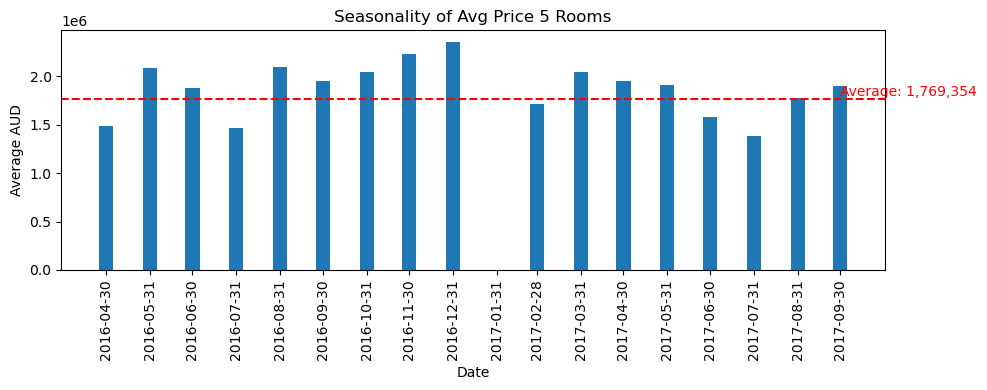

In [102]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices5_monthly_df.index
Price = Bedroomprices5_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 5 Rooms')
plt.tight_layout()

plt.show()

In [103]:
Bedroomprices_6_df= numberofrooms_trends_df.query('Bedroom2==6')
Bedroomprices_6_df.head()

Date    Price  Bedroom2
47    5/7/2016   725000         6
292   6/4/2016  2425000         6
392  8/22/2016  2752000         6
515  12/3/2016  4000000         6
663  5/22/2016  1900000         6

In [105]:
Bedroomprices_6_df['Date'] = pd.to_datetime(Bedroomprices_6_df['Date'])
Bedroomprices6_monthly_df= Bedroomprices_6_df.resample('ME', on='Date').mean()
Bedroomprices6_monthly_df.fillna(0, inplace=True)
Bedroomprices6_monthly_df

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/1069263713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bedroomprices_6_df['Date'] = pd.to_datetime(Bedroomprices_6_df['Date'])


Price  Bedroom2
Date                              
2016-05-31  1.556250e+06       6.0
2016-06-30  2.068750e+06       6.0
2016-07-31  1.440500e+06       6.0
2016-08-31  4.626000e+06       6.0
2016-09-30  1.666000e+06       6.0
2016-10-31  0.000000e+00       0.0
2016-11-30  2.125000e+06       6.0
2016-12-31  2.268000e+06       6.0
2017-01-31  0.000000e+00       0.0
2017-02-28  1.900000e+06       6.0
2017-03-31  2.025000e+06       6.0
2017-04-30  1.727500e+06       6.0
2017-05-31  1.300333e+06       6.0
2017-06-30  2.013650e+06       6.0
2017-07-31  1.735000e+06       6.0
2017-08-31  1.275333e+06       6.0
2017-09-30  1.489200e+06       6.0

In [106]:
#Bedroomprices6_monthly_df= Bedroomprices_6_df.resample('ME', on='Date').mean()
#Bedroomprices6_monthly_df.fillna(0, inplace=True)
#Bedroomprices6_monthly_df

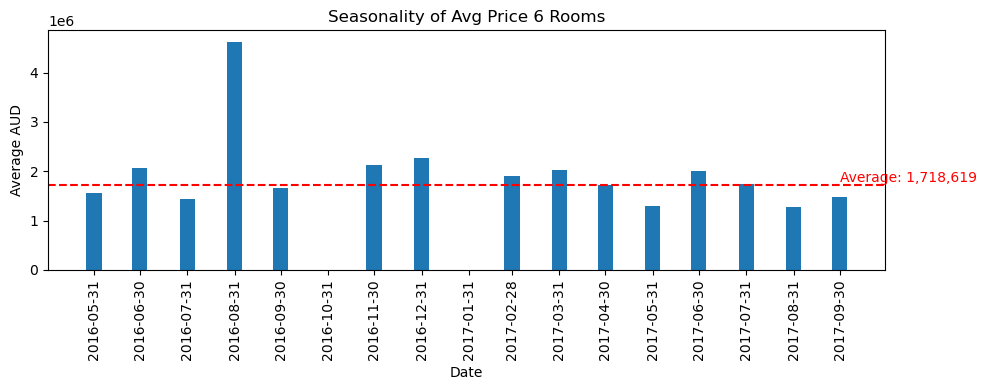

In [107]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices6_monthly_df.index
Price = Bedroomprices6_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 6 Rooms')
plt.tight_layout()

plt.show()

In [108]:
Bedroom_sales_year = melhousingclean_df.groupby(['Year', 'Bedroom2']).size().reset_index(name='Count')
Bedroom_sales_year

Year  Bedroom2  Count
0   2016.0         0     10
1   2016.0         1    380
2   2016.0         2   2065
3   2016.0         3   2621
4   2016.0         4   1010
5   2016.0         5    219
6   2016.0         6     20
7   2017.0         0      6
8   2017.0         1    311
9   2017.0         2   1672
10  2017.0         3   3275
11  2017.0         4   1591
12  2017.0         5    337
13  2017.0         6     43

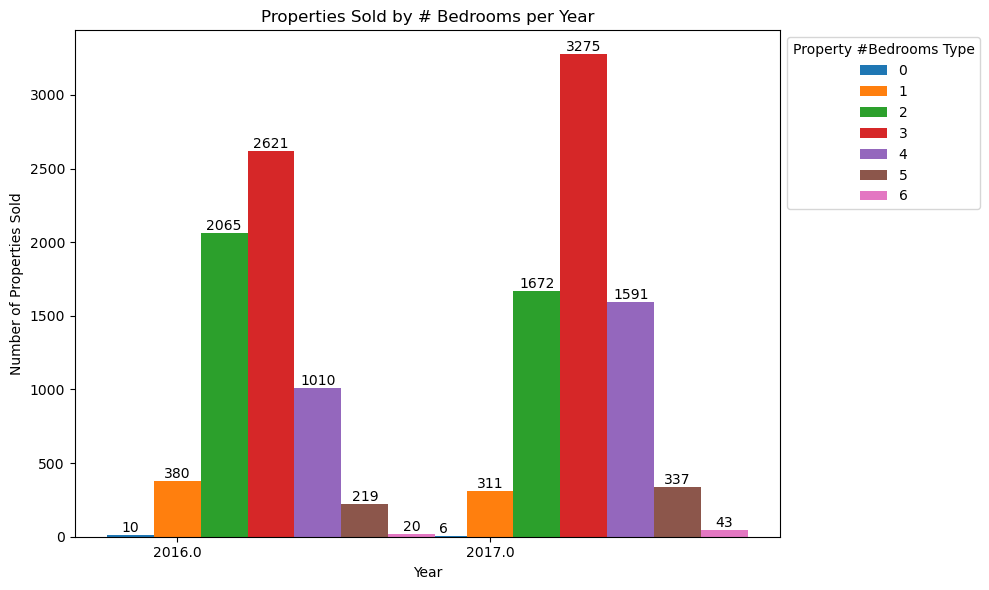

In [109]:
# Step 1: Group the data by 'Year' and 'Type' and count occurrences
#house_per_year = melhousingclean_df.groupby(['Year', 'Type']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))

Sales_Roomtypes = Bedroom_sales_year['Bedroom2'].unique()
years = Bedroom_sales_year['Year'].unique()

bar_width = 0.15
positions = list(range(len(years)))

for i, Sales_Roomtypes in enumerate(Sales_Roomtypes):
    subset = Bedroom_sales_year[Bedroom_sales_year['Bedroom2'] == Sales_Roomtypes]
    bars = plt.bar([p + i * bar_width for p in positions], subset['Count'], width=bar_width, label=Sales_Roomtypes)
    
    # Step 3: Add counts on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.title('Properties Sold by # Bedrooms per Year')
plt.xticks([p + bar_width for p in positions], years)
plt.legend(title='Property #Bedrooms Type', loc='upper left', bbox_to_anchor=(1, 1))

# Display the chart
plt.tight_layout()
plt.show()

In [110]:
# Group by 'Year' and 'number of rooms' (replace with actual column names if different)
avg_price_per_year = melhousingclean_df.groupby(['Year', 'Bedroom2'])['Price'].mean().reset_index()

# Rename the columns for clarity
avg_price_per_year.columns = ['Year', 'Rooms', 'Average_Price']

# Display the resulting DataFrame
print(avg_price_per_year)

      Year  Rooms  Average_Price
0   2016.0      0   1.039200e+06
1   2016.0      1   4.454258e+05
2   2016.0      2   7.740983e+05
3   2016.0      3   1.115431e+06
4   2016.0      4   1.575171e+06
5   2016.0      5   2.038360e+06
6   2016.0      6   2.194450e+06
7   2017.0      0   1.015250e+06
8   2017.0      1   4.495510e+05
9   2017.0      2   8.044380e+05
10  2017.0      3   1.056142e+06
11  2017.0      4   1.374188e+06
12  2017.0      5   1.734238e+06
13  2017.0      6   1.663407e+06


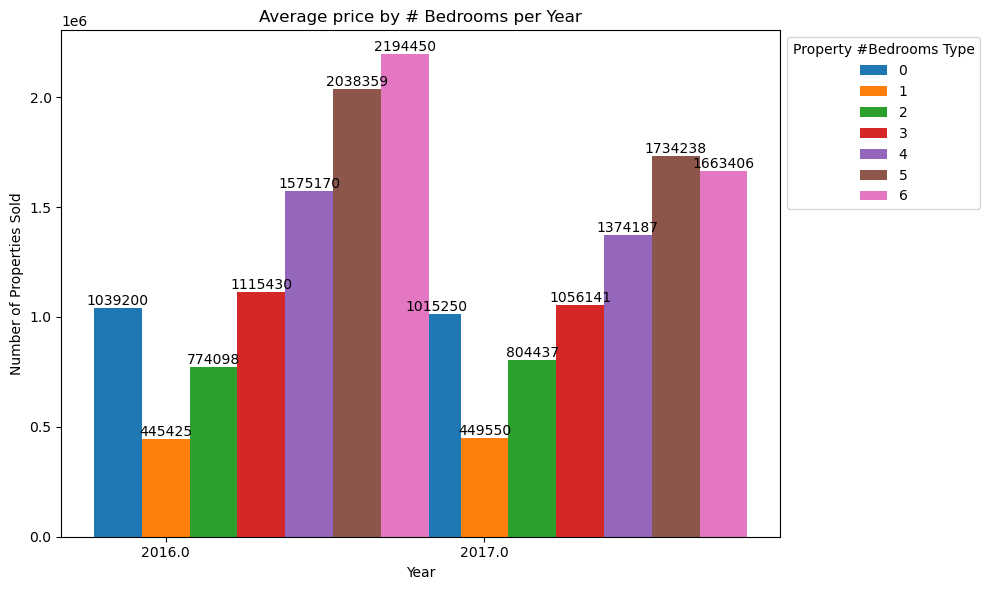

In [111]:
# Step 1: Group the data by 'Year' and 'Type' and count occurrences

plt.figure(figsize=(10, 6))

Average_price_Roomtypes = avg_price_per_year['Rooms'].unique()
Year = avg_price_per_year['Year'].unique()

bar_width = 0.15
positions = list(range(len(years)))

for i, Average_price_Roomtypes in enumerate(Average_price_Roomtypes):
    subset = avg_price_per_year[avg_price_per_year['Rooms'] == Average_price_Roomtypes]
    bars = plt.bar([p + i * bar_width for p in positions], subset['Average_Price'], width=bar_width, label=Average_price_Roomtypes)
    
    # Step 3: Add counts on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.title('Average price by # Bedrooms per Year')
plt.xticks([p + bar_width for p in positions], years)
plt.legend(title='Property #Bedrooms Type', loc='upper left', bbox_to_anchor=(1, 1))

# Display the chart
plt.tight_layout()
plt.show()

In [112]:
filtered_data = avg_price_per_year[avg_price_per_year['Year'].isin([2016, 2017])]
filtered_data

Year  Rooms  Average_Price
0   2016.0      0   1.039200e+06
1   2016.0      1   4.454258e+05
2   2016.0      2   7.740983e+05
3   2016.0      3   1.115431e+06
4   2016.0      4   1.575171e+06
5   2016.0      5   2.038360e+06
6   2016.0      6   2.194450e+06
7   2017.0      0   1.015250e+06
8   2017.0      1   4.495510e+05
9   2017.0      2   8.044380e+05
10  2017.0      3   1.056142e+06
11  2017.0      4   1.374188e+06
12  2017.0      5   1.734238e+06
13  2017.0      6   1.663407e+06

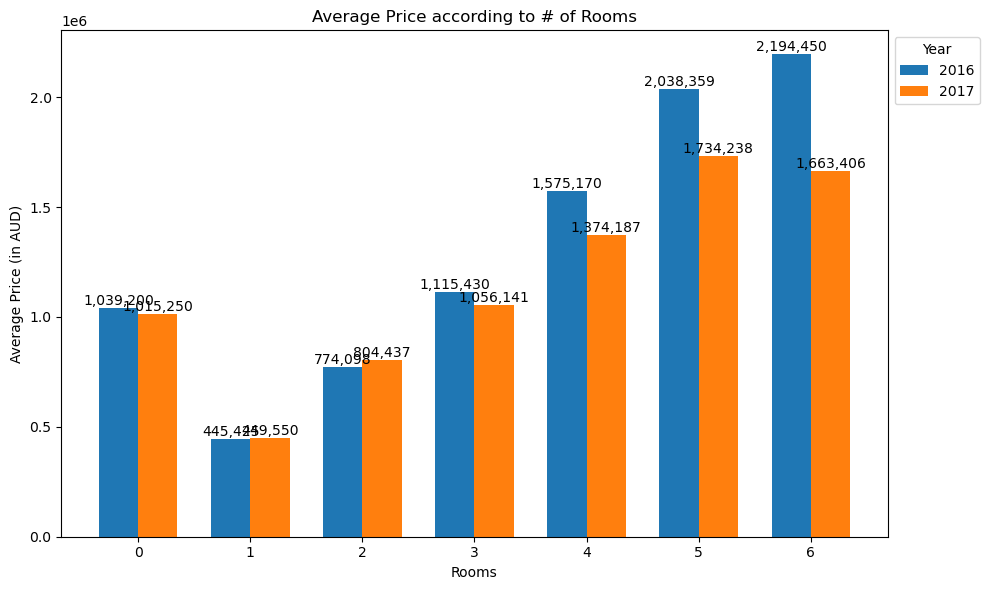

In [113]:
plt.figure(figsize=(10, 6))

years = [2016, 2017]  
Roomtypes = filtered_data['Rooms'].unique()  # Get the unique room numbers

bar_width = 0.35  # Adjust the width of the bars
positions = list(range(len(Roomtypes)))  # Set the positions for the rooms

# Step 3: Loop through the years and plot bars for each year
for i, year in enumerate(years):
    subset = filtered_data[filtered_data['Year'] == year]
    bars = plt.bar([p + i * bar_width for p in positions], subset['Average_Price'], width=bar_width, label=year)
    
    # Step 4: Add average prices on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Rooms')
plt.ylabel('Average Price (in AUD)')
plt.title('Average Price according to # of Rooms')
plt.xticks([p + bar_width / 2 for p in positions], Roomtypes)  # Center the labels for rooms
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Step 5: Display the chart
plt.tight_layout()
plt.show()

In [117]:
mat_plot_3= melhousingclean_df.hvplot.points(
    "Long", 
    "Lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="price",
    scale=0.01,
    color="Regionname" 
)
mat_plot_3

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Regionname)

In [126]:
mat_plot_3= melhousingclean_df.hvplot.points(
    "Long", 
    "Lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="price",
    scale=0.01,
    color="Type" 
)
mat_plot_3

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Type)

In [127]:
#creating Ranges for #rooms to be mapped

# Define the rooms bins and corresponding labels
bins = [0, 2, 3, 4,5, float('inf')]  # Rooms ranges
labels = [ '0-2 Rooms', '3 Rooms', '4 Rooms' ,'5 Rooms','>5 Rooms']  # Labels for each range

# Create a new column 'Price_Range' based on the 'Price' column
melhousingclean_df['Rooms_Range'] = pd.cut(melhousingclean_df['Bedroom2'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(melhousingclean_df)

              Suburb           Address  Rooms   Type    Price Method  \
0         Abbotsford      85 Turner St      2  house  1480000      S   
1         Abbotsford   25 Bloomburg St      2  house  1035000      S   
2         Abbotsford      5 Charles St      3  house  1465000     SP   
3         Abbotsford  40 Federation La      3  house   850000     PI   
4         Abbotsford       55a Park St      4  house  1600000     VB   
...              ...               ...    ...    ...      ...    ...   
13575  Wheelers Hill      12 Strada Cr      4  house  1245000      S   
13576   Williamstown     77 Merrett Dr      3  house  1031000     SP   
13577   Williamstown       83 Power St      3  house  1170000      S   
13578   Williamstown      96 Verdon St      4  house  2500000     PI   
13579     Yarraville        6 Agnes St      4  house  1285000     SP   

      PropertyAgent       Date  Distance  Postcode  ...  Bathroom  Car  \
0            Biggin  12/3/2016       2.5      3067  ...      

In [128]:
mat_plot_3= melhousingclean_df.hvplot.points(
    "Long", 
    "Lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="price",
    scale=0.01,
    color="Rooms_Range" 
)
mat_plot_3

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Rooms_Range)

In [129]:
room_counts=  melhousingclean_df['Bedroom2'].value_counts()
print(room_counts)

Bedroom2
3     5896
2     3737
4     2601
1      691
5      556
6       63
0       16
7       10
8        5
9        3
20       1
10       1
Name: count, dtype: int64


In [130]:
#creating Ranges for prices to be mapped

# Define the price bins and corresponding labels
bins = [0, 400000, 600000, 800000,1000000,1500000,2000000, float('inf')]  # Price ranges
labels = [ '<400K', '<600K', '<800K' ,'<1MM','<1.5MM','<2MM','>2MM']  # Labels for each range

# Create a new column 'Price_Range' based on the 'Price' column
melhousingclean_df['Price_Range'] = pd.cut(melhousingclean_df['Price'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(melhousingclean_df)

              Suburb           Address  Rooms   Type    Price Method  \
0         Abbotsford      85 Turner St      2  house  1480000      S   
1         Abbotsford   25 Bloomburg St      2  house  1035000      S   
2         Abbotsford      5 Charles St      3  house  1465000     SP   
3         Abbotsford  40 Federation La      3  house   850000     PI   
4         Abbotsford       55a Park St      4  house  1600000     VB   
...              ...               ...    ...    ...      ...    ...   
13575  Wheelers Hill      12 Strada Cr      4  house  1245000      S   
13576   Williamstown     77 Merrett Dr      3  house  1031000     SP   
13577   Williamstown       83 Power St      3  house  1170000      S   
13578   Williamstown      96 Verdon St      4  house  2500000     PI   
13579     Yarraville        6 Agnes St      4  house  1285000     SP   

      PropertyAgent       Date  Distance  Postcode  ...  Car  Landsize  \
0            Biggin  12/3/2016       2.5      3067  ...  1.0 

In [131]:
mat_plot_3= melhousingclean_df.hvplot.points(
    "Long", 
    "Lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="price",
    scale=0.01,
    color="Price_Range" 
)
mat_plot_3

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Price_Range)

In [132]:
Price_range_counts=  melhousingclean_df['Price_Range'].value_counts()
print(Price_range_counts)

Price_Range
<1.5MM    3302
<800K     2712
<1MM      2370
<600K     2042
<2MM      1476
>2MM      1062
<400K      616
Name: count, dtype: int64


/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/3541428967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bedroom2', y='Price', data=melhousingclean_df, palette='coolwarm' )


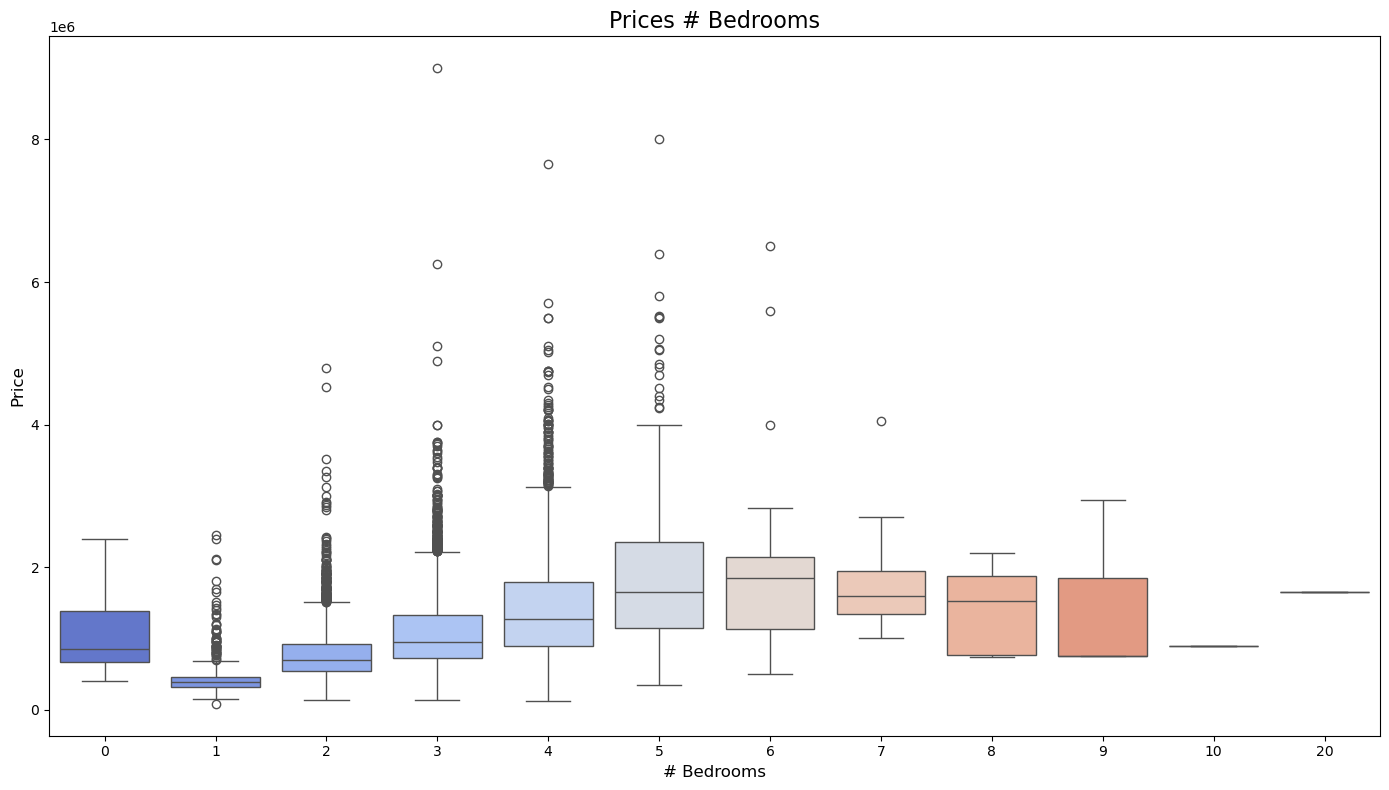

In [133]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='Bedroom2', y='Price', data=melhousingclean_df, palette='coolwarm' )

plt.title('Prices # Bedrooms', fontsize=16)
plt.xlabel('# Bedrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()  

plt.show()

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/149398794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bathroom', y='Price', data=melhousingclean_df, palette='coolwarm' )


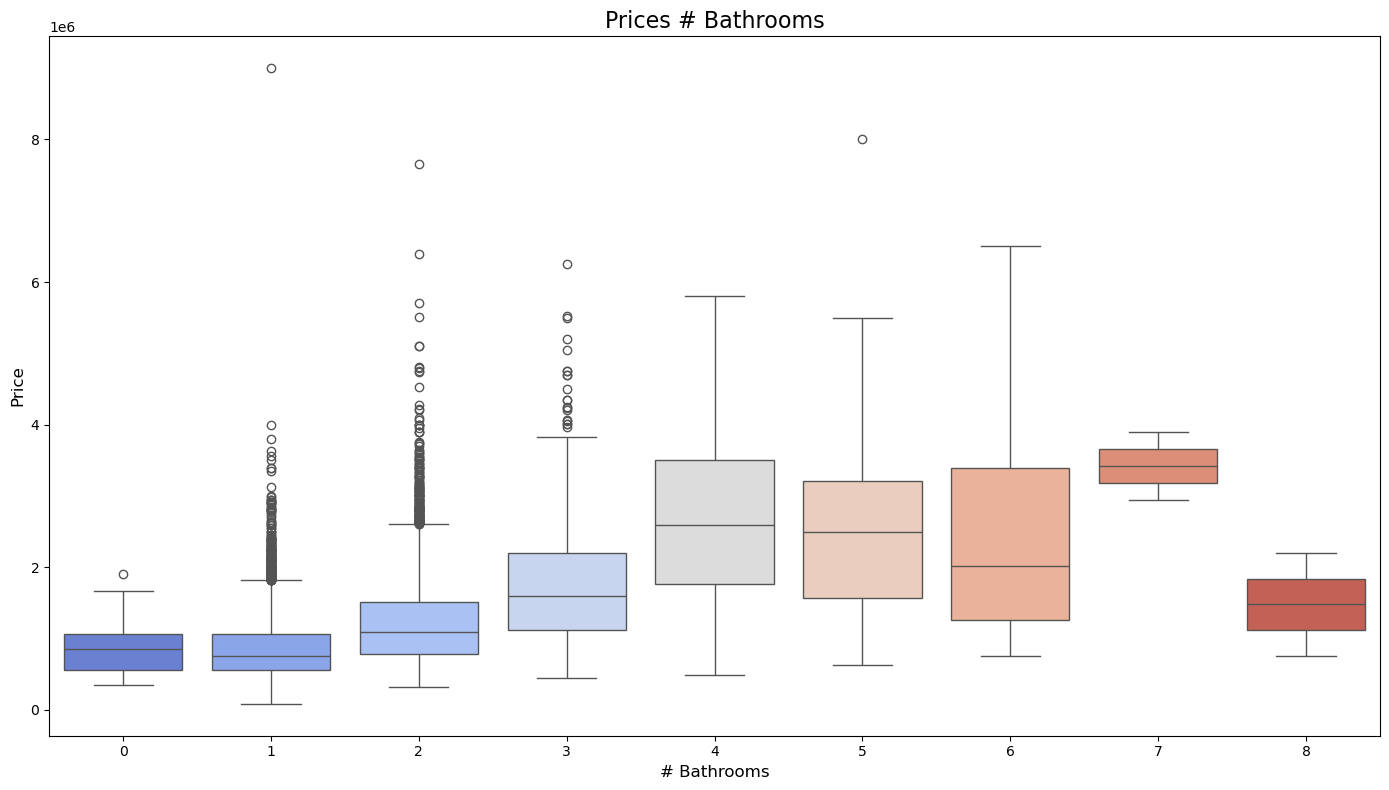

In [134]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='Bathroom', y='Price', data=melhousingclean_df, palette='coolwarm' )

plt.title('Prices # Bathrooms', fontsize=16)
plt.xlabel('# Bathrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()  

plt.show()

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_6822/162668599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Price', data=melhousingclean_df, palette='coolwarm' )


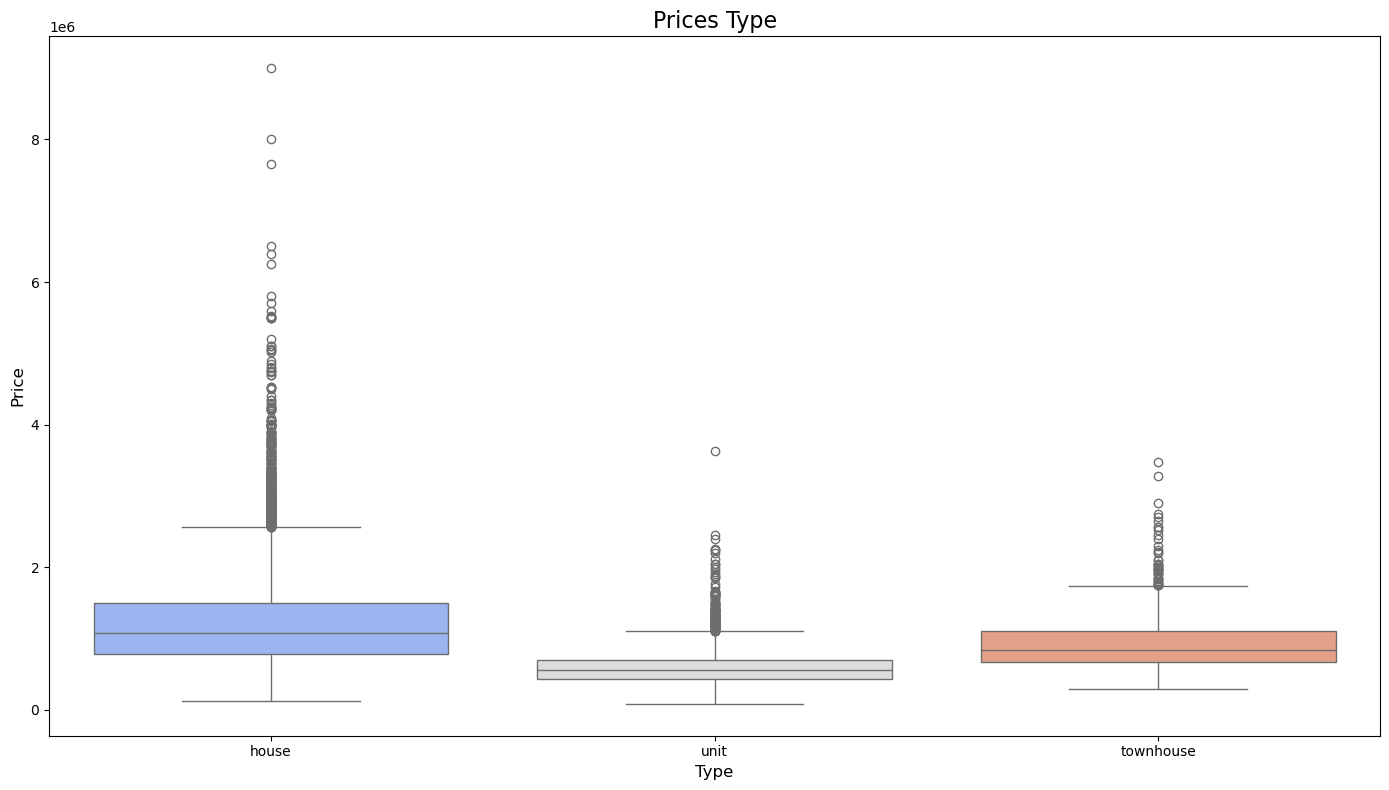

In [135]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='Type', y='Price', data=melhousingclean_df, palette='coolwarm' )

plt.title('Prices Type', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()  

plt.show()

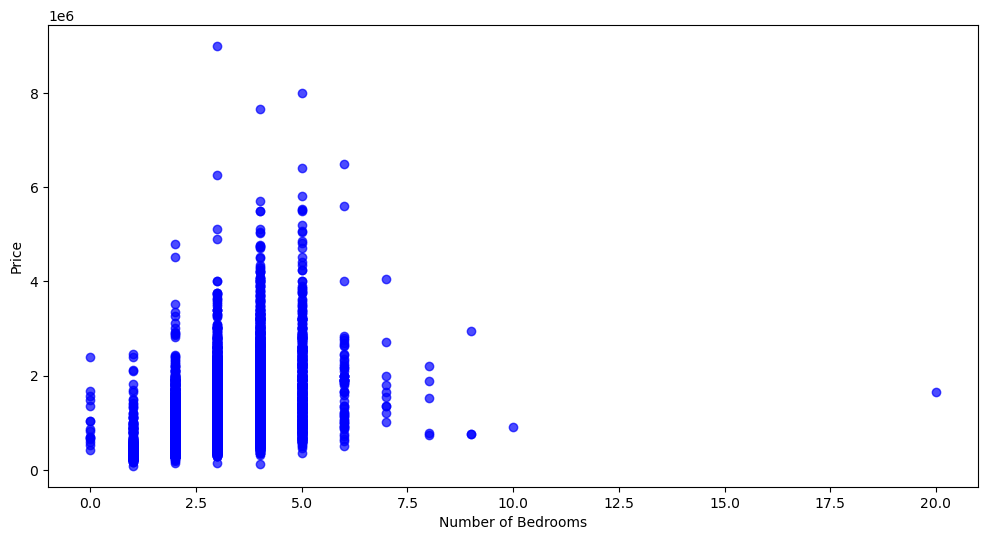

In [136]:
plt.figure (figsize=(12,6))

plt.scatter(melhousingclean_df['Bedroom2'],melhousingclean_df['Price'],color='blue',alpha=0.7)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [137]:
correlation = melhousingclean_df['Bedroom2'].corr(melhousingclean_df['Price'])
print(f"The correlation between Number of Bedrooms and Price: {correlation:.2f}")

The correlation between Number of Bedrooms and Price: 0.48


The r-squared is: 0.22652938522037233


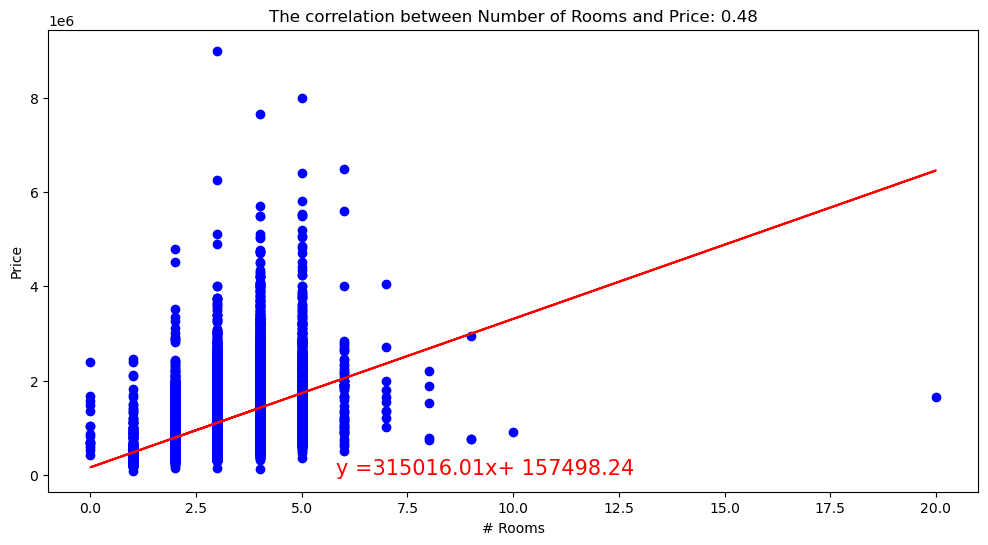

In [138]:
#linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(melhousingclean_df['Bedroom2'], melhousingclean_df['Price'])

#to create the plot
x_values = melhousingclean_df['Bedroom2']
y_values = slope * x_values + intercept
line_eq= "y ="+ str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.figure(figsize=(12, 6))
plt.scatter(melhousingclean_df['Bedroom2'], melhousingclean_df['Price'], color='blue')
plt.plot(x_values, y_values, color='red')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title(f"The correlation between Number of Rooms and Price: {correlation:.2f}")
plt.xlabel('# Rooms')
plt.ylabel('Price')
print(f"The r-squared is: {r_value**2}")

plt.show()

In [139]:
correlationbath = melhousingclean_df['Bathroom'].corr(melhousingclean_df['Price'])
print(f"The correlation between Number of Bedrooms and Price: {correlationbath:.2f}")

The correlation between Number of Bedrooms and Price: 0.47


The r-squared is: 0.2181246642119472


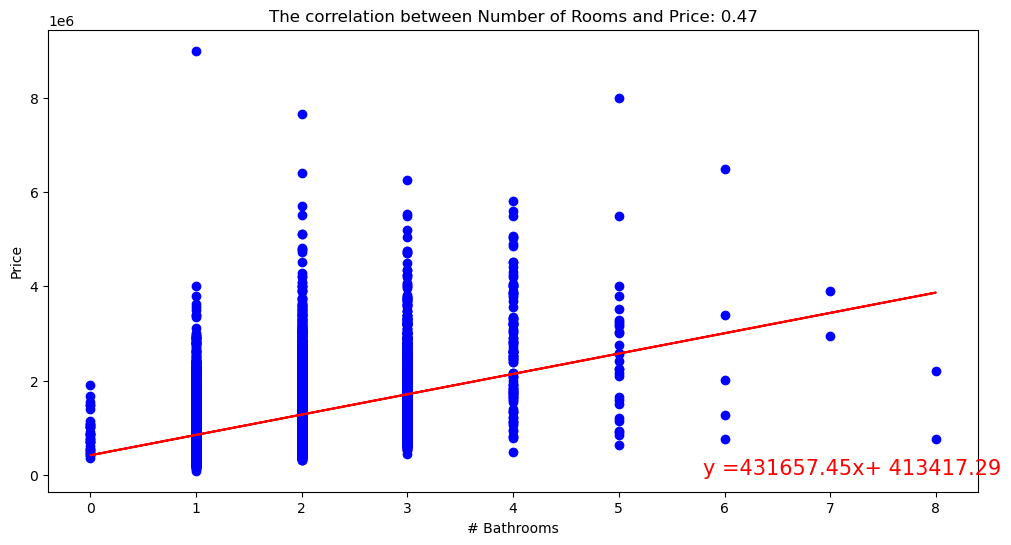

In [140]:
#linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(melhousingclean_df['Bathroom'], melhousingclean_df['Price'])

#to create the plot
x_values = melhousingclean_df['Bathroom']
y_values = slope * x_values + intercept
line_eq= "y ="+ str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.figure(figsize=(12, 6))
plt.scatter(melhousingclean_df['Bathroom'], melhousingclean_df['Price'], color='blue')
plt.plot(x_values, y_values, color='red')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title(f"The correlation between Number of Rooms and Price: {correlationbath:.2f}")
plt.xlabel('# Bathrooms')
plt.ylabel('Price')
print(f"The r-squared is: {r_value**2}")

plt.show()

# Part 3 Analysis - Wisdom